In [1]:
import pandas as pd
import numpy as np

In [ ]:
'''
df_GrowthCurve_allData = pd.read_csv('GrowthCurve_allData.csv') #rename and delte some cols
df_control_growth_curves = pd.read_csv('Control_growthcurves.csv') #nothing to change but NO PLATE INFO
df_Enamine_DR_growthCurves=pd.read_csv('Enamine_DR_growthcurves.csv')
df_Enamine_t6_t12_wells=pd.read_csv('Enamine_t6_t12_wells.csv')
df_Enamine_t6_t12_controls=pd.read_csv('Enamine_t6_t12_ctrls.csv')
'''

## df_GrowthCurve_allData

In [2]:
df_GrowthCurve_allData = pd.read_csv('GrowthCurve_allData.csv') #rename and delte some cols
df_GrowthCurve_allData = df_GrowthCurve_allData.drop(columns=['row','column','endOD',
       'maxOD', 'maxOD.t', 'expAcc', 'lag', 'statAcc', 'stat', 'maxR',
       'maxR.t', 'minR', 'minR.t', 'Function', 'Structure_class_1',
       'Structure_class_2', 'Target.1']) 

df_GrowthCurve_allData = df_GrowthCurve_allData.rename(columns={'ProductName': 'Compound','Plate':'Plate_ID', 'MIC':'Control_Label'})

df_GrowthCurve_allData["Control_Label"] = df_GrowthCurve_allData["Control_Label"].apply(
       lambda x: 1 if x in ['Cipro', 'Fosfo'] else (-1 if x == 'DMSO' else 0)
)

df_GrowthCurve_allData

,Well,Plate_ID,Concentration,Compound,t_0,t_2.08,t_4.16,t_6.24,t_8.32,t_10.4,t_12.48,Control_Label,Smiles
0,A01,546,0.2,DMSO,0.0,0.281996,0.570499,0.763557,0.872017,0.965293,1.041215,-1,NaN
1,A02,546,0.2,DMSO,0.0,0.288503,0.613883,0.778742,0.889371,0.978308,1.062907,-1,NaN
2,A03,546,0.2,Polyoxyethylene stearate,0.0,0.286334,0.587852,0.765727,0.889371,0.982646,1.043384,0,O=C(OCCO)CCCCCCCCCCCCCCCCC.[n].[n].[=].[10]
3,A04,546,0.2,Lefamulin (acetate),0.0,0.262473,0.559653,0.737527,0.863341,0.950108,1.008677,0,CC(O)=O.C[C@@H]1C23[C@](C(CC3)=O)([H])C([C@H](...
4,A05,546,0.2,Cefodizime (sodium),0.0,0.275488,0.924078,0.676790,0.685466,0.668113,0.672451,0,O=C(C(N12)=C(CSC3=NC(C)=C(CC(O[Na])=O)S3)CS[C@...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18427,P20,S10,7.9,DMSO,0.0,0.187970,0.511278,0.736842,0.857143,0.924812,0.989975,-1,NaN
18428,P21,S10,7.9,DMSO,0.0,0.185464,0.491228,0.736842,0.867168,0.937343,1.002506,-1,NaN
18429,P22,S10,7.9,DMSO,0.0,0.187970,0.506266,0.741855,0.874687,0.942356,1.012531,-1,NaN
18430,P23,S10,7.9,DMSO,0.0,0.197995,0.523810,0.761905,0.877193,0.932331,0.997494,-1,NaN


## df_Enamine_t6_t12_wells/controls

In [3]:
df_Enamine_t6_t12_wells=pd.read_csv('Enamine_t6_t12_wells.csv')
df_Enamine_t6_t12_controls=pd.read_csv('Enamine_t6_t12_ctrls.csv')
df_Enamine_t6_t12_controls = df_Enamine_t6_t12_controls.drop(columns=['Unnamed: 0'], errors='ignore')


In [4]:
print(df_Enamine_t6_t12_controls['Replicate'].unique())
print(df_Enamine_t6_t12_wells['Replicate'].unique())

df_Enamine_t6_t12_controls

['OD_A' 'OD_C']
['OD_A' 'OD_C']


,Well,Replicate,Compound,t_0,t_6,t_12,Smiles,Plate_ID,Concentration
0,A01,OD_A,DMSO,0.000000,0.584807,1.150336,NaN,1886318-Y12-A081,50
1,A02,OD_A,Ciprofloxacin,0.003213,0.003213,0.000000,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1886318-Y12-A081,50
2,A23,OD_A,DMSO,0.000000,0.552675,1.098924,NaN,1886318-Y12-A081,50
3,A24,OD_A,DMSO,0.000000,0.552675,1.111777,NaN,1886318-Y12-A081,50
4,B01,OD_A,DMSO,0.000000,0.607300,1.137483,NaN,1886318-Y12-A081,50
...,...,...,...,...,...,...,...,...,...
12795,O24,OD_C,DMSO,0.000000,0.604127,1.090567,NaN,1886318-Y12-A100,50
12796,P01,OD_C,DMSO,0.000000,0.708738,1.205639,NaN,1886318-Y12-A100,50
12797,P02,OD_C,DMSO,0.000000,0.632895,1.085337,NaN,1886318-Y12-A100,50
12798,P23,OD_C,Ciprofloxacin,0.000000,0.005231,0.002615,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1886318-Y12-A100,50


In [5]:
df_Enamine_t6_t12_wells=df_Enamine_t6_t12_wells.rename(columns={'t_6': 't_6.24','t_12':'t_12.48'})
df_Enamine_t6_t12_controls=df_Enamine_t6_t12_controls.rename(columns={'t_6': 't_6.24','t_12':'t_12.48'})


df_Enamine_t6_t12_wells['Concentration'] = 50
df_Enamine_t6_t12_controls['Concentration'] = 50

df_Enamine_t6_t12_wells['Control_Label'] = 0


df_Enamine_t6_t12_controls['Control_Label'] = df_Enamine_t6_t12_controls["Compound"].apply(
    lambda x: 1 if x == 'Ciprofloxacin' else -1
)
df_Enamine_t6_t12_wells=df_Enamine_t6_t12_wells.drop(columns=['Activity'])


In [6]:
df_Enamine_t6_t12_controls

,Well,Replicate,Compound,t_0,t_6.24,t_12.48,Smiles,Plate_ID,Concentration,Control_Label
0,A01,OD_A,DMSO,0.000000,0.584807,1.150336,NaN,1886318-Y12-A081,50,-1
1,A02,OD_A,Ciprofloxacin,0.003213,0.003213,0.000000,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1886318-Y12-A081,50,1
2,A23,OD_A,DMSO,0.000000,0.552675,1.098924,NaN,1886318-Y12-A081,50,-1
3,A24,OD_A,DMSO,0.000000,0.552675,1.111777,NaN,1886318-Y12-A081,50,-1
4,B01,OD_A,DMSO,0.000000,0.607300,1.137483,NaN,1886318-Y12-A081,50,-1
...,...,...,...,...,...,...,...,...,...,...
12795,O24,OD_C,DMSO,0.000000,0.604127,1.090567,NaN,1886318-Y12-A100,50,-1
12796,P01,OD_C,DMSO,0.000000,0.708738,1.205639,NaN,1886318-Y12-A100,50,-1
12797,P02,OD_C,DMSO,0.000000,0.632895,1.085337,NaN,1886318-Y12-A100,50,-1
12798,P23,OD_C,Ciprofloxacin,0.000000,0.005231,0.002615,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1886318-Y12-A100,50,1


## df_control_growth_curves

In [7]:
df_control_growth_curves = pd.read_csv('Control_growthcurves.csv') 

In [8]:
df_control_growth_curves["Well"] = df_control_growth_curves["Well"].str[0] + df_control_growth_curves["Well"].str[1:].str.zfill(2)

df_control_growth_curves['Control_Label'] = df_control_growth_curves["Compound"].apply(
    lambda x: -1 if x == 'DMSO' else 1
)
df_control_growth_curves["Plate_ID"] = 'unknown'

In [9]:
df_control_growth_curves

,Well,Concentration,Compound,Replicate,t_0,t_2.08,t_4.16,t_6.24,t_8.32,t_10.4,t_12.48,Smiles,Control_Label,Plate_ID
0,C03,50.00,Rifampicin,4,0.003157,0.001579,0.001579,0.001579,0.001579,0.001579,0.003157,CN1CCN(CC1)/N=C/c2c(O)c3c5C(=O)[C@@]4(C)O/C=C/...,1,unknown
1,C04,0.20,Fosfomycin,1,0.000000,0.137337,0.503571,0.688266,0.926633,1.109750,1.212358,C[C@H]1[C@H](O1)P(=O)(O)O,1,unknown
2,C06,7.90,Ciprofloxacin,4,0.000000,0.012629,0.014207,0.012629,0.011050,0.011050,0.009472,C1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1,unknown
3,C08,3.13,Ciprofloxacin,5,0.000000,0.029993,0.042622,0.039465,0.036308,0.033150,0.031572,C1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1,unknown
4,C09,50.00,Trimethoprim,5,0.000000,0.033150,0.137337,0.157859,0.172066,0.154702,0.170488,Nc1nc(N)ncc1Cc(cc2OC)cc(OC)c2OC,1,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,N16,7.90,Ciprofloxacin,2,0.000000,0.009472,0.011050,0.011050,0.009472,0.009472,0.007893,C1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1,unknown
196,N17,7.90,DMSO,5,0.000000,0.127866,0.451477,0.607758,0.771931,0.838232,1.101857,NaN,-1,unknown
197,N20,3.13,Rifampicin,6,0.000000,0.066301,0.102608,0.101030,0.086823,0.083665,0.061565,CN1CCN(CC1)/N=C/c2c(O)c3c5C(=O)[C@@]4(C)O/C=C/...,1,unknown
198,N21,50.00,DMSO,2,0.000000,0.126287,0.416748,0.514621,0.606179,0.674058,0.735624,NaN,-1,unknown


## df_Enamine_DR_growthCurves

In [10]:
df_Enamine_DR_growthCurves=pd.read_csv('Enamine_DR_growthcurves.csv')

In [11]:
df_Enamine_DR_growthCurves

,Well,Plate,Compound,Concentration,Replicate,t_0,t_2.08,t_4.16,t_6.24,t_8.32,t_10.4,t_12.48,MIC,Smiles
0,A03,111-DR1,Z27542156,50.000,D,0.0,0.130220,0.434068,0.625569,0.732809,0.840049,0.947289,Inactive,[O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2
1,A04,111-DR1,Z27542156,12.500,D,0.0,0.171074,0.518328,0.651102,0.778769,0.901329,1.018783,Inactive,[O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2
2,A05,111-DR1,Z27542156,3.130,D,0.0,0.181287,0.543862,0.668975,0.801749,0.926863,1.039210,Inactive,[O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2
3,A06,111-DR1,Z27542156,0.781,D,0.0,0.194054,0.556628,0.679189,0.804302,0.931969,1.039210,Inactive,[O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2
4,A07,111-DR1,Z27542156,0.200,D,0.0,0.194054,0.571948,0.686849,0.814516,0.939629,1.049423,Inactive,[O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,P03,111-DR9,Z6204188633,50.000,E,0.0,0.225165,0.501503,0.624320,0.716433,0.790635,0.859720,Inactive,NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1
2636,P04,111-DR9,Z6204188633,12.500,E,0.0,0.291691,0.614086,0.734344,0.857161,0.959509,1.056739,Inactive,NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1
2637,P05,111-DR9,Z6204188633,3.130,E,0.0,0.281456,0.624320,0.762490,0.890424,1.000448,1.107913,Inactive,NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1
2638,P06,111-DR9,Z6204188633,0.781,E,0.0,0.278897,0.647349,0.752255,0.895541,1.013241,1.123265,Inactive,NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1


In [12]:
df_Enamine_DR_growthCurves=df_Enamine_DR_growthCurves.rename(columns={"Plate":"Plate_ID"})
df_Enamine_DR_growthCurves['Control_Label'] = 0

df_Enamine_DR_growthCurves=df_Enamine_DR_growthCurves.drop(columns=['MIC'])

In [13]:
print(df_Enamine_DR_growthCurves['Replicate'].unique())
df_Enamine_DR_growthCurves

['D' 'E']


,Well,Plate_ID,Compound,Concentration,Replicate,t_0,t_2.08,t_4.16,t_6.24,t_8.32,t_10.4,t_12.48,Smiles,Control_Label
0,A03,111-DR1,Z27542156,50.000,D,0.0,0.130220,0.434068,0.625569,0.732809,0.840049,0.947289,[O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2,0
1,A04,111-DR1,Z27542156,12.500,D,0.0,0.171074,0.518328,0.651102,0.778769,0.901329,1.018783,[O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2,0
2,A05,111-DR1,Z27542156,3.130,D,0.0,0.181287,0.543862,0.668975,0.801749,0.926863,1.039210,[O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2,0
3,A06,111-DR1,Z27542156,0.781,D,0.0,0.194054,0.556628,0.679189,0.804302,0.931969,1.039210,[O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2,0
4,A07,111-DR1,Z27542156,0.200,D,0.0,0.194054,0.571948,0.686849,0.814516,0.939629,1.049423,[O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,P03,111-DR9,Z6204188633,50.000,E,0.0,0.225165,0.501503,0.624320,0.716433,0.790635,0.859720,NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1,0
2636,P04,111-DR9,Z6204188633,12.500,E,0.0,0.291691,0.614086,0.734344,0.857161,0.959509,1.056739,NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1,0
2637,P05,111-DR9,Z6204188633,3.130,E,0.0,0.281456,0.624320,0.762490,0.890424,1.000448,1.107913,NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1,0
2638,P06,111-DR9,Z6204188633,0.781,E,0.0,0.278897,0.647349,0.752255,0.895541,1.013241,1.123265,NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1,0


In [14]:
df_Enamine_DR_compounds = df_Enamine_DR_growthCurves['Compound'].unique()

# Concat them

In [ ]:
#df_Enamine_t6_t12_wells = df_Enamine_t6_t12_wells[~df_Enamine_t6_t12_wells["Compound"].isin(df_Enamine_DR_compounds)]

In [13]:
set(df_Enamine_t6_t12_controls['Plate_ID'].unique()) ==set(df_Enamine_t6_t12_wells['Plate_ID'].unique()) 

True

In [100]:

comb_df = pd.concat([df_GrowthCurve_allData,df_Enamine_t6_t12_wells], ignore_index=True)

comb_df=pd.concat([comb_df, df_Enamine_t6_t12_controls], ignore_index=True)

#I need to exclude the DR data for now because I do not hvae negative contorl information for the plates
'''
comb_df = pd.concat([df_Enamine_DR_growthCurves, df_GrowthCurve_allData], ignore_index=True)

comb_df=pd.concat([comb_df, df_Enamine_t6_t12_wells], ignore_index=True)

comb_df=pd.concat([comb_df, df_control_growth_curves], ignore_index=True)

comb_df=pd.concat([comb_df, df_Enamine_t6_t12_controls], ignore_index=True)
'''

'\ncomb_df = pd.concat([df_Enamine_DR_growthCurves, df_GrowthCurve_allData], ignore_index=True)\n\ncomb_df=pd.concat([comb_df, df_Enamine_t6_t12_wells], ignore_index=True)\n\ncomb_df=pd.concat([comb_df, df_control_growth_curves], ignore_index=True)\n\ncomb_df=pd.concat([comb_df, df_Enamine_t6_t12_controls], ignore_index=True)\n'

Replciates D and E come from dataset df_Enamine_DR_growthCurves

Replicates 1 to 6 come from df_control_growth_curves

Replciates OD_A and OD_C come from t6_t12_controls and t6_t12_wells

# Add active/inactive label based on -3*MAD threshold on DMSO per plate

In [16]:
comb_df.shape

(95232, 14)

In [17]:
comb_df

,Well,Plate_ID,Concentration,Compound,t_0,t_2.08,t_4.16,t_6.24,t_8.32,t_10.4,t_12.48,Control_Label,Smiles,Replicate
0,A01,546,0.2,DMSO,0.0,0.281996,0.570499,0.763557,0.872017,0.965293,1.041215,-1,NaN,NaN
1,A02,546,0.2,DMSO,0.0,0.288503,0.613883,0.778742,0.889371,0.978308,1.062907,-1,NaN,NaN
2,A03,546,0.2,Polyoxyethylene stearate,0.0,0.286334,0.587852,0.765727,0.889371,0.982646,1.043384,0,O=C(OCCO)CCCCCCCCCCCCCCCCC.[n].[n].[=].[10],NaN
3,A04,546,0.2,Lefamulin (acetate),0.0,0.262473,0.559653,0.737527,0.863341,0.950108,1.008677,0,CC(O)=O.C[C@@H]1C23[C@](C(CC3)=O)([H])C([C@H](...,NaN
4,A05,546,0.2,Cefodizime (sodium),0.0,0.275488,0.924078,0.676790,0.685466,0.668113,0.672451,0,O=C(C(N12)=C(CSC3=NC(C)=C(CC(O[Na])=O)S3)CS[C@...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95227,O24,1886318-Y12-A100,50.0,DMSO,0.0,NaN,NaN,0.604127,NaN,NaN,1.090567,-1,NaN,OD_C
95228,P01,1886318-Y12-A100,50.0,DMSO,0.0,NaN,NaN,0.708738,NaN,NaN,1.205639,-1,NaN,OD_C
95229,P02,1886318-Y12-A100,50.0,DMSO,0.0,NaN,NaN,0.632895,NaN,NaN,1.085337,-1,NaN,OD_C
95230,P23,1886318-Y12-A100,50.0,Ciprofloxacin,0.0,NaN,NaN,0.005231,NaN,NaN,0.002615,1,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,OD_C


50 median_val - 2 * mad_val: 0.0
50 median_val - 2 * mad_val: 0.08584909279220501
50 median_val - 2 * mad_val: 0.34221818506052104
50 median_val - 2 * mad_val: 0.519348940953728
50 median_val - 2 * mad_val: 0.7047183281892095
50 median_val - 2 * mad_val: 0.8332255874641111
50 median_val - 2 * mad_val: 0.9087788890492721


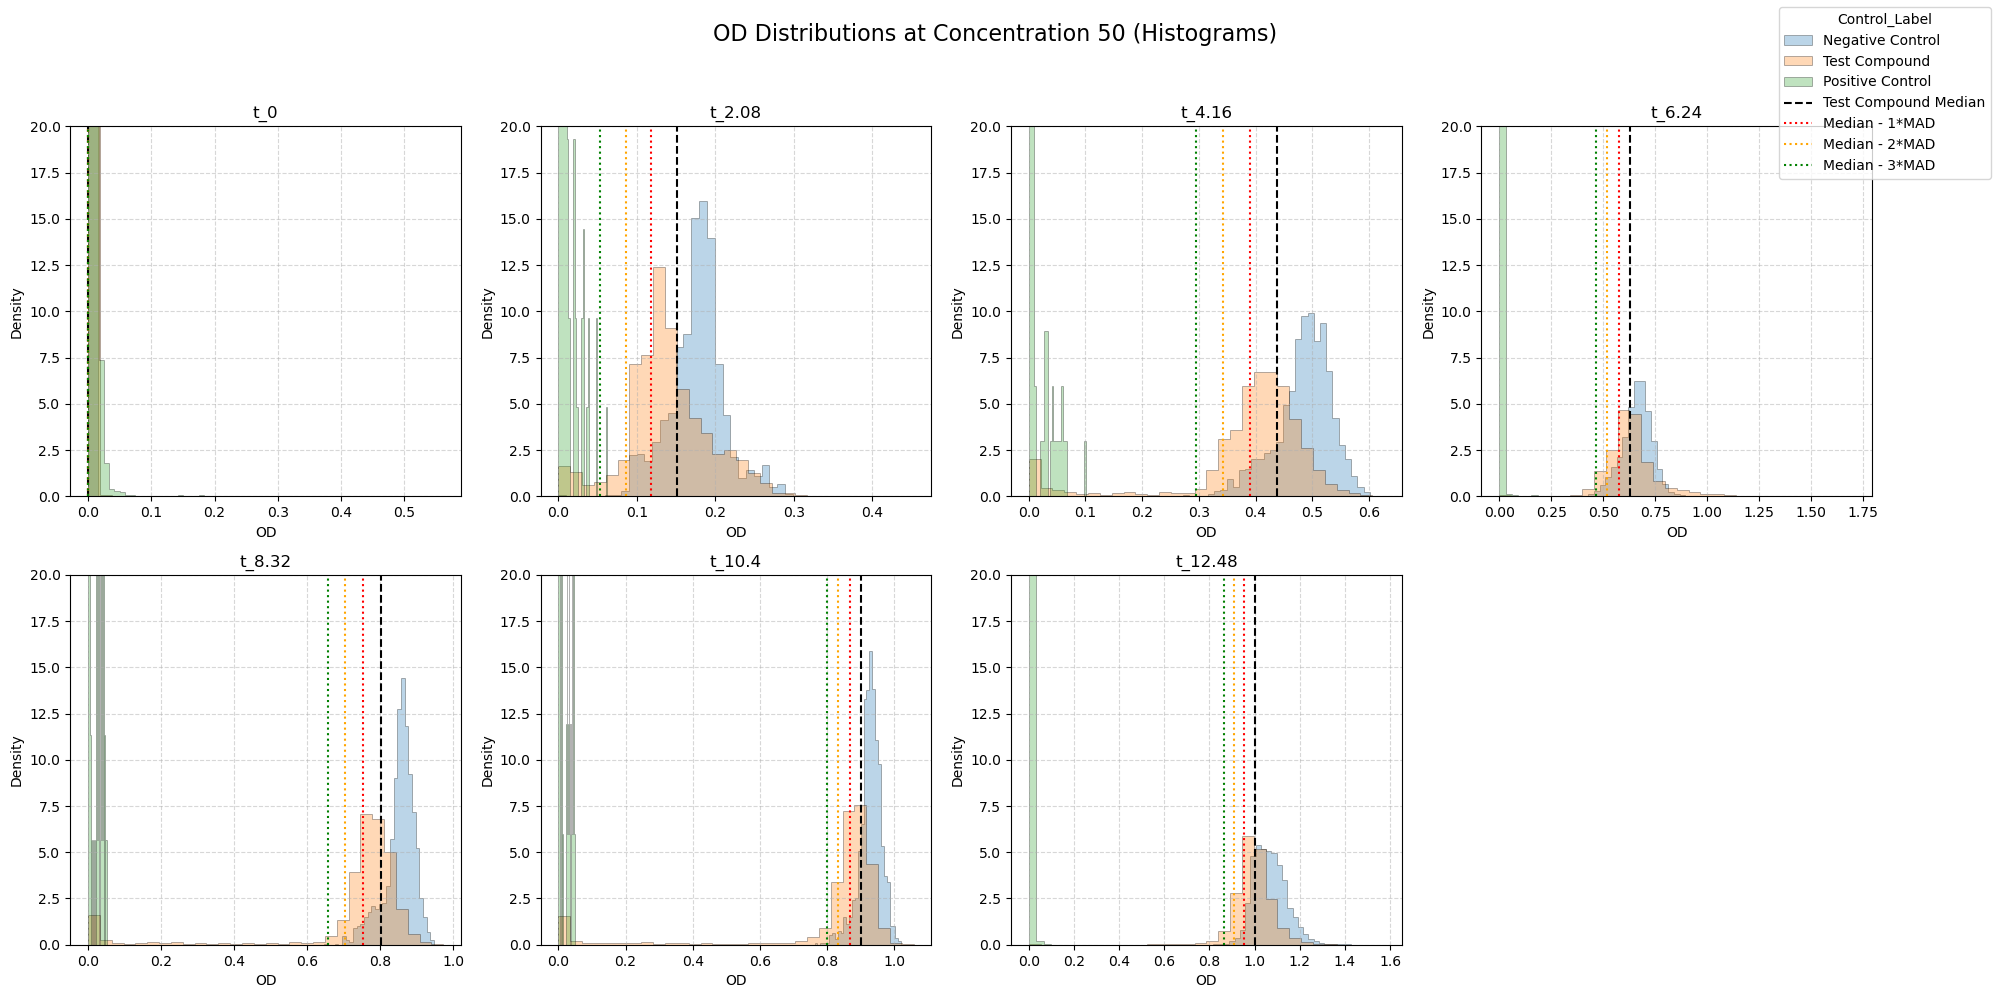

In [101]:
import matplotlib.pyplot as plt

def plot_hist_od_distributions(df, concentration, max_density):
    timepoints = ['t_0', 't_2.08', 't_4.16', 't_6.24', 't_8.32', 't_10.4', 't_12.48']
    labels = [-1, 0, 1]
    colors = { -1: '#1f77b4', 0: '#ff7f0e', 1: '#2ca02c' }
    label_names = {-1: "Negative Control", 0: "Test Compound", 1: "Positive Control"}

    # Filter the data based on the given concentration
    df_sub = df[df['Concentration'] == concentration]
    
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
    axes = axes.flatten()

    for i, time in enumerate(timepoints):
        ax = axes[i]
        # Plot histograms for each control label group
        for label in labels:
            subset = df_sub[df_sub['Control_Label'] == label]
            ax.hist(
                subset[time],
                bins=30,
                alpha=0.3,
                density=True,
                label=label_names[label],  # Use descriptive label names
                color=colors[label],
                histtype='stepfilled',
                edgecolor='black',
                linewidth=0.7
            )
        # Calculate median and MAD for Test Compounds at the current timepoint (Control_Label == 0)
        #test_subset = df_sub[df_sub['Control_Label'] == 0]
        test_subset = df_sub[df_sub['Control_Label'] != 1]

        median_val = test_subset[time].median()
        mad_val = np.median(np.abs(test_subset[time].dropna() - median_val))
        print(f'{concentration} median_val - 2 * mad_val: {median_val - 2 * mad_val}')
        
        # Plot vertical lines for the median and median minus 1, 2, and 3 MAD.
        # Label the lines only on the first subplot to avoid duplicate entries in the legend.
        if i == 0:
            ax.axvline(median_val, color='black', linestyle='--', linewidth=1.5, label='Test Compound Median')
            ax.axvline(median_val - mad_val, color='red', linestyle=':', linewidth=1.5, label='Median - 1*MAD')
            ax.axvline(median_val - 2 * mad_val, color='orange', linestyle=':', linewidth=1.5, label='Median - 2*MAD')
            ax.axvline(median_val - 3 * mad_val, color='green', linestyle=':', linewidth=1.5, label='Median - 3*MAD')
        else:
            ax.axvline(median_val, color='black', linestyle='--', linewidth=1.5)
            ax.axvline(median_val - mad_val, color='red', linestyle=':', linewidth=1.5)
            ax.axvline(median_val - 2 * mad_val, color='orange', linestyle=':', linewidth=1.5)
            ax.axvline(median_val - 3 * mad_val, color='green', linestyle=':', linewidth=1.5)
        
        ax.set_title(f'{time}')
        ax.set_xlabel('OD')
        ax.set_ylabel('Density')
        ax.grid(True, linestyle='--', alpha=0.5)
        
        # Set the y-axis limit to ensure consistency across subplots
        ax.set_ylim(0, max_density)

    # Remove any extra subplots
    for j in range(len(timepoints), len(axes)):
        fig.delaxes(axes[j])

    # Get handles and update the legend based on the descriptive labels and added vertical lines
    handles, legend_labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, legend_labels, loc='upper right', title='Control_Label')
    
    fig.suptitle(f'OD Distributions at Concentration {concentration} (Histograms)', fontsize=16)
    plt.tight_layout(rect=[0, 0, 0.95, 0.95])
    #plt.savefig(f'/home/ethan/GrowthCurve/plots/OD_control_dist_{concentration}.png')
    plt.show()

plot_hist_od_distributions(comb_df, 50, 20)

In [102]:
timepoints = ['t_0','t_2.08','t_4.16','t_6.24','t_8.32','t_10.4','t_12.48']

df_long = comb_df.melt(
    id_vars   = ['Well','Plate_ID','Concentration','Compound','Control_Label','Replicate','Smiles'],
    value_vars= timepoints,
    var_name  = 'Timepoint',
    value_name= 'OD'
)

dmso = df_long[df_long['Control_Label'] == -1]

group_stats = (
    dmso
    .groupby(['Plate_ID','Concentration','Timepoint'])['OD']
    .agg(
        dmso_median = 'median',
        dmso_mad    = lambda x: np.median(np.abs(x - np.median(x)))
    )
    .reset_index()
)
group_stats['threshold'] = group_stats['dmso_median'] - 3*group_stats['dmso_mad']


comb_df = df_long.merge(
    group_stats[['Plate_ID','Concentration','Timepoint','threshold']],
    on=['Plate_ID','Concentration','Timepoint'],
    how='left'
)

comb_df['is_Active'] = (
    (comb_df['Control_Label'] == 0) &
    (comb_df['OD'] < comb_df['threshold'])
).astype(int)



# Row and Column Batch effect

In [103]:
mask_actives = (comb_df['is_Active'] == 1) | (comb_df['Control_Label'] == 1)


# 2) Pull them out into their own DataFrame
df_actives = comb_df.loc[mask_actives].copy()

# 3) Keep only the rows you’re not removing
comb_df_no_active = comb_df.loc[~mask_actives].reset_index(drop=True)


In [104]:
comb_df_no_active['is_Active'].sum()

0

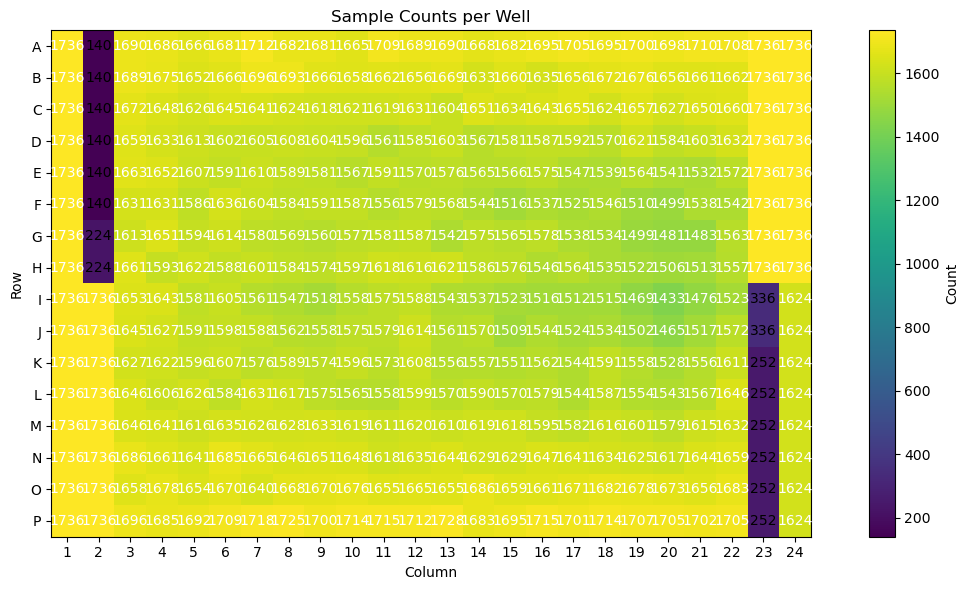

In [105]:
import numpy as np
import matplotlib.pyplot as plt

def plot_sample_counts_per_well(
    df,
    well_col: str = 'Well',
    rows: list[str] = None,
    cols: list[int] = None,
    figsize: tuple[int,int] = (12, 6),
    title: str = 'Sample Counts per Well',
    cmap: str = 'viridis'
):
    """
    Count occurrences of each well in `df[well_col]` and plot a 16×24 plate heatmap
    annotated with the raw counts.

    Parameters
    ----------
    df : pd.DataFrame
        Your dataframe containing a column of well IDs like 'A01'…'P24'.
    well_col : str
        Name of the column with well IDs.
    rows : list[str], optional
        Plate row labels. Defaults to ['A','B',…,'P'].
    cols : list[int], optional
        Plate column labels. Defaults to [1,2,…,24].
    figsize : (width, height)
        Figure size in inches.
    title : str
        Plot title.
    cmap : str
        Matplotlib colormap for the heatmap.
    """
    # defaults for full 16×24 plate
    if rows is None:
        rows = [chr(c) for c in range(ord('A'), ord('P')+1)]
    if cols is None:
        cols = list(range(1, 25))

    # build the count matrix
    counts = df[well_col].value_counts()
    mat = np.zeros((len(rows), len(cols)), dtype=int)
    for i, r in enumerate(rows):
        for j, c in enumerate(cols):
            well = f"{r}{c:02d}"
            mat[i, j] = counts.get(well, 0)

    # plot
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.imshow(mat, origin='upper', aspect='equal', cmap=cmap)
    max_val = mat.max()

    # annotate with counts
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            color = 'white' if mat[i, j] > max_val/2 else 'black'
            ax.text(j, i, mat[i, j], ha='center', va='center', color=color)

    # axis labels
    ax.set_xticks(np.arange(len(cols)))
    ax.set_xticklabels(cols)
    ax.set_yticks(np.arange(len(rows)))
    ax.set_yticklabels(rows)
    ax.set_xlabel('Column')
    ax.set_ylabel('Row')
    ax.set_title(title)

    # colorbar
    fig.colorbar(cax, ax=ax, label='Count')
    plt.tight_layout()

    return fig, ax

fig, ax = plot_sample_counts_per_well(comb_df_no_active)
plt.show()

{'A': 'P', 'B': 'O', 'C': 'N', 'D': 'M', 'E': 'L', 'F': 'K', 'G': 'J', 'H': 'I', 'I': 'H', 'J': 'G', 'K': 'F', 'L': 'E', 'M': 'D', 'N': 'C', 'O': 'B', 'P': 'A'}


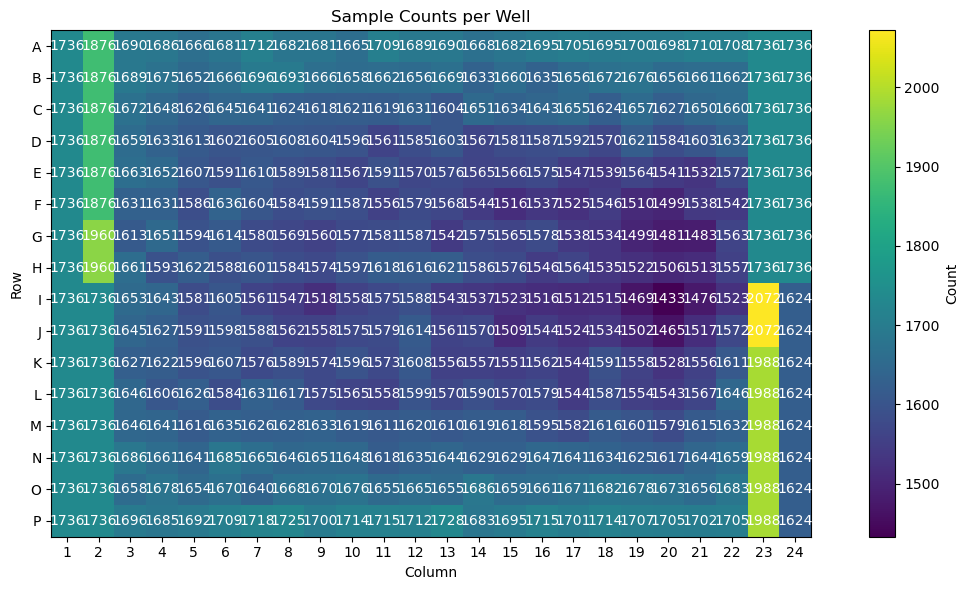

In [106]:

def augment_specific_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    - For column '02', duplicate rows I–P into A–H (A02 ← P02, B02 ← O02, … H02 ← I02).
    - For column '23', duplicate rows A–H into I–P (P23 ← A23, O23 ← B23, … I23 ← H23).
    """
    rows = [chr(c) for c in range(ord('A'), ord('P')+1)]
    
    # A<->P, B<->O, …, H<->I
    sym_map = { r: rows[-1-i] for i, r in enumerate(rows) }
    print(sym_map)
    to_append = []

    # 1) Column '02': copy I–P rows into A–H
    for r in rows[:8]:               # A,B,C,D,E,F,G,H
        src_well = f"{sym_map[r]}02" # P02, O02, …, I02
        tgt_well = f"{r}02"          # A02, B02, …, H02
        chunk = df[df['Well'] == src_well].copy()
        if not chunk.empty:
            chunk['Well'] = tgt_well
            to_append.append(chunk)

    # 2) Column '23': copy A–H rows into I–P
    for r in rows[:8]:               # A,B,C,D,E,F,G,H
        src_well = f"{r}23"          # A23, B23, …, H23
        tgt_well = f"{sym_map[r]}23" # P23, O23, …, I23
        chunk = df[df['Well'] == src_well].copy()
        if not chunk.empty:
            chunk['Well'] = tgt_well
            to_append.append(chunk)

    # 3) Concatenate back onto the original
    if to_append:
        df = pd.concat([df, *to_append], ignore_index=True)
    return df


df_filled = augment_specific_columns(comb_df_no_active)

fig, ax = plot_sample_counts_per_well(df_filled)
plt.show()


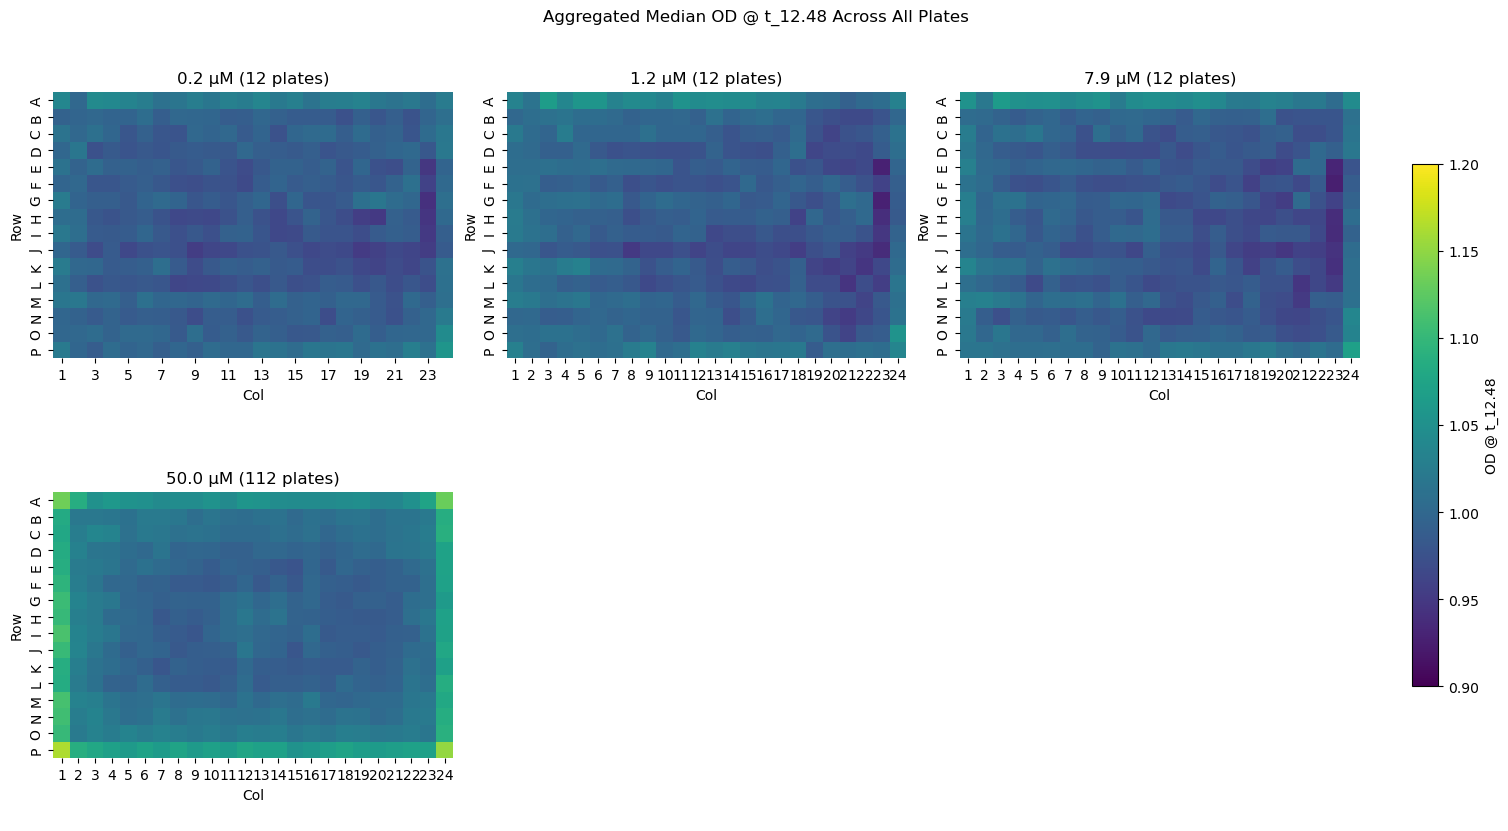

In [107]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_aggregated_heatmaps_long(
    df_long,
    timepoint,

    vmin=None,
    vmax=None,
    max_cols=3,
    cmap='viridis',
    figsize_per_subplot=(5, 4),
    savepath=None
):
    """
    Aggregates median OD values at a given timepoint across all plates,
    then plots one heatmap per concentration using long-format DataFrame.
    Removed DMSO overlay.
    """
    concs = sorted(df_long['Concentration'].dropna().unique())
    n = len(concs)
    ncols = min(max_cols, n)
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(
        nrows, ncols,
        figsize=(figsize_per_subplot[0] * ncols, figsize_per_subplot[1] * nrows),
        constrained_layout=True
    )
    axes = np.atleast_1d(axes).flatten()

    for ax, conc in zip(axes, concs):
        sub = df_long[
            (df_long['Concentration'] == conc) &
            (df_long['Timepoint'] == timepoint)
        ]

        # compute median OD per well
        med = sub.groupby('Well')['OD'].median().reset_index(name='MedianOD')
        med['Row'] = med['Well'].str[0]
        med['Col'] = med['Well'].str[1:].astype(int)
        heatmap_data = med.pivot(index='Row', columns='Col', values='MedianOD')

        # draw heatmap
        im = sns.heatmap(
            heatmap_data,
            ax=ax,
            cmap=cmap,
            vmin=vmin,
            vmax=vmax,
            cbar=False,
            square=True
        )

        # annotate number of plates
        num_plates = sub['Plate_ID'].nunique()
        ax.set_title(f'{conc} µM ({num_plates} plates)')
        ax.set_xlabel('Col')
        ax.set_ylabel('Row')

    # turn off unused subplots
    for ax in axes[len(concs):]:
        ax.axis('off')

    # shared colorbar
    mappable = axes[0].collections[0]
    fig.colorbar(
        mappable,
        ax=axes.tolist(),
        orientation='vertical',
        fraction=0.02,
        pad=0.04,
        label=f'OD @ {timepoint}'
    )

    plt.suptitle(f'Aggregated Median OD @ {timepoint} Across All Plates', y=1.02)
    if savepath:
        plt.savefig(savepath)
    plt.show()


plot_aggregated_heatmaps_long(
    df_filled,
    timepoint='t_12.48',
    vmin=0.9,
    vmax=1.2,
    max_cols=3,
    cmap='viridis',
    figsize_per_subplot=(5, 4),
    savepath=None
)

In [108]:
def correct_well_batch_effect(df_long):

    #Inactive compounds
    inactive = df_long[df_long['is_Active'] == 0]

    #Per-spot median (Well, Timepoint)
    well_medians = (
        inactive
        .groupby(['Well'])['OD']
        .median()
        .reset_index(name='well_meds')
    )


    #Global median per Timepoint
    global_medians = (
        inactive
        .groupby('Timepoint')['OD']
        .median()
        .reset_index(name='global_meds')
    )

    df = df_long.merge(well_medians, on=['Well'], how='left')
    df = df.merge(global_medians, on=['Timepoint'], how='left')

    #batch‐corrected OD
    mask = df['Timepoint'] != 't_0'
    df.loc[mask, 'OD'] = (
        df.loc[mask, 'OD'] 
        / df.loc[mask, 'well_meds'] 
        #* df.loc[mask, 'global_meds']
    )
    
    df = df.drop(columns=['well_meds', 'global_meds'])

    return df, global_medians, well_medians

#ADD BACK ACTIVE COMPOUNDS
df_filled_with_actives= pd.concat([df_filled,df_actives], ignore_index=True)

df_well_corrected,global_medians,well_medians = correct_well_batch_effect(df_filled_with_actives)



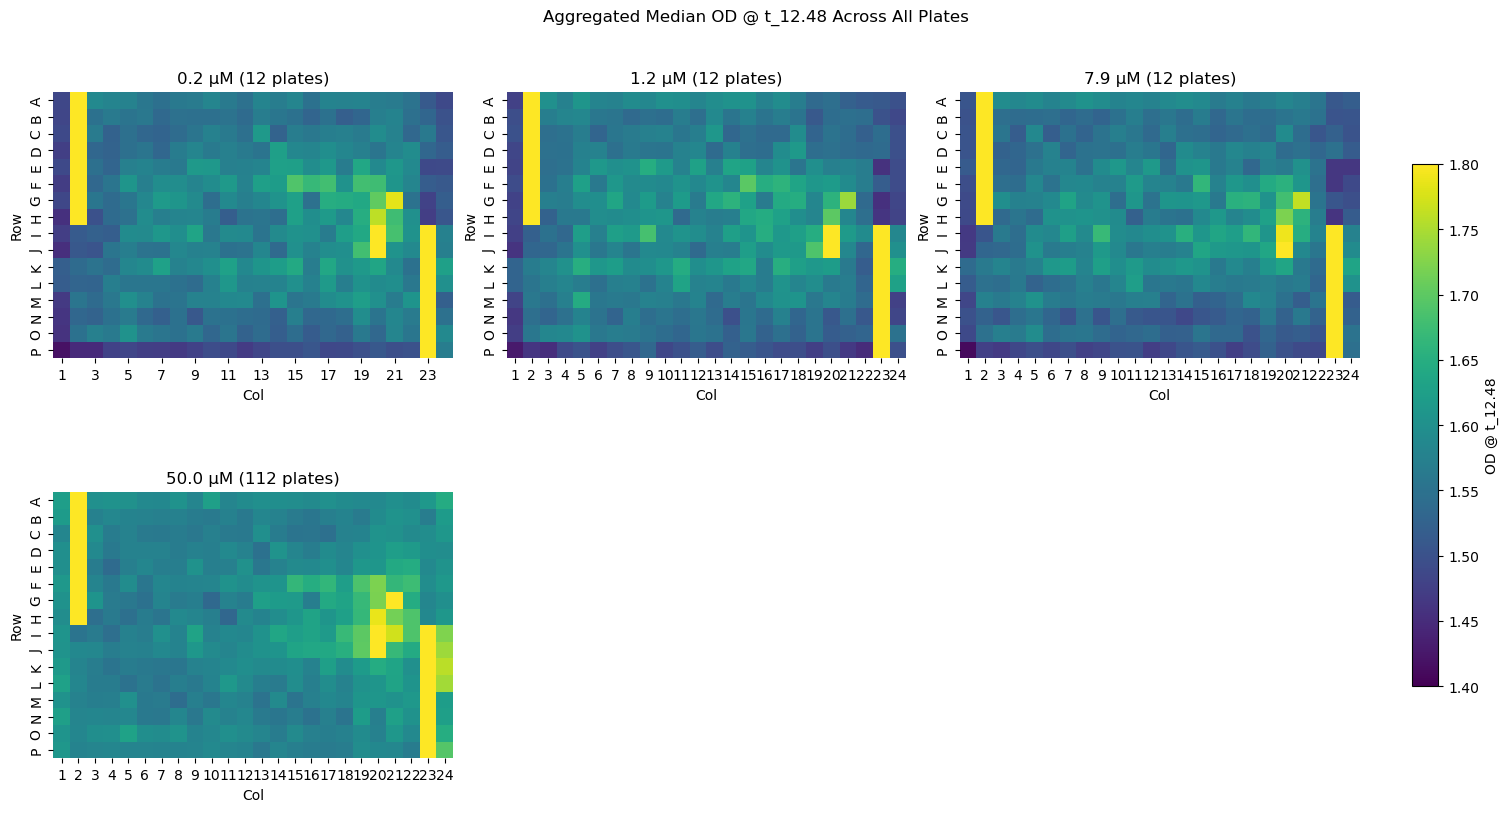

In [119]:
plot_aggregated_heatmaps_long(
    df_well_corrected,
    timepoint='t_12.48',
    vmin=1.4,
    vmax=1.8,
    max_cols=3,
    cmap='viridis',
    figsize_per_subplot=(5, 4),
    savepath=None
)

# Median of Plate Negative control batch effect

In [137]:
df_well_corrected['Control_Label'].value_counts()

 0    531272
-1    137928
 1     25200
Name: Control_Label, dtype: int64

In [138]:
import pandas as pd

def correct_plate_batch_effect(
    df: pd.DataFrame,
) -> pd.DataFrame:

    # 1) Compute median OD of negative controls on each plate
    neg_ctrl = df[df['Control_Label'] == -1]
    plate_ctrl_meds = (
        neg_ctrl
        .groupby('Plate_ID')['OD']
        .median()
        .reset_index(name='plate_ctrl_med')
    )

    # 2) Merge back onto full DataFrame
    df_norm = df.merge(plate_ctrl_meds, on='Plate_ID', how='left')

    # 3) Normalize
    df_norm['OD'] = df_norm['OD'] / df_norm['plate_ctrl_med']

    # 4) Clean up
    df_norm = df_norm.drop(columns=['plate_ctrl_med'])

    return df_norm

df_plate_well_corrected = correct_plate_batch_effect(df_well_corrected)



# OD distributions at concentrations

In [140]:
import numpy as np
import matplotlib.pyplot as plt

def plot_hist_od_distributions_long(
    df_long,
    bins,                       # NEW: can be int/array *or* dict{label: int/array}
    concentration,
    max_density,
    max_x,
    time_col='Timepoint',
    od_col='OD',
    conc_col='Concentration',
    control_label_col='Control_Label'
):
    """
    Plot overlaid OD histograms by Control_Label at each timepoint,
    allowing a different `bins` specification for each label.
    """
    # ── helper to fetch per-label bins ───────────────────────────────────────────
    def _bins_for(label):
        # if user gave one global spec => just echo it back
        if not isinstance(bins, dict):
            return bins
        # else fall back to a reasonable default (e.g. 30) if key missing
        return bins.get(label, 30)

    # timepoints in chronological order
    timepoints = sorted(
        df_long[time_col].dropna().unique(),
        key=lambda s: float(s.split('_')[1])
    )

    labels       = [-1, 0, 1]
    colors       = {-1:'#1f77b4', 0:'#ff7f0e', 1:'#2ca02c'}
    label_names  = {-1:"Negative Control", 0:"Test Compound", 1:"Positive Control"}

    df_sub = df_long[df_long[conc_col] == concentration]

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    for i, tp in enumerate(timepoints):
        ax     = axes[i]
        sub_tp = df_sub[df_sub[time_col] == tp]

        for lab in labels:
            grp = sub_tp[sub_tp[control_label_col] == lab]
            ax.hist(
                grp[od_col],
                bins=_bins_for(lab),        # ← per-label bins
                alpha=0.30,
                density=True,
                label=label_names[lab],
                color=colors[lab],
                histtype='stepfilled',
                edgecolor='black',
                linewidth=0.7
            )

        # reference lines computed on negatives only
        test_grp = sub_tp[sub_tp[control_label_col] == -1]
        med = test_grp[od_col].median()
        mad = np.median(np.abs(test_grp[od_col].dropna() - med))

        if i == 0:
            ax.axvline(med,            color='black', linestyle='--', linewidth=1.5, label='Median')
            ax.axvline(med - mad,      color='red',   linestyle=':',  linewidth=1.5, label='-1 MAD')
            ax.axvline(med - 2*mad,    color='orange',linestyle=':',  linewidth=1.5, label='-2 MAD')
            ax.axvline(med - 3*mad,    color='green', linestyle=':',  linewidth=1.5, label='-3 MAD')
        else:
            for k, col in enumerate(['black','red','orange','green']):
                ax.axvline(med - k*mad,
                           color=col,
                           linestyle='--' if k==0 else ':',
                           linewidth=1.5)

        ax.set_title(tp)
        ax.set_xlabel('OD')
        ax.set_ylabel('Density')
        ax.set_ylim(0, max_density)
        ax.set_xlim(0, max_x)
        ax.grid(True, linestyle='--', alpha=0.5)

    # strip unused panels
    for j in range(len(timepoints), len(axes)):
        fig.delaxes(axes[j])

    handles, labels_ = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels_, loc='upper right', title='Control_Label')
    fig.suptitle(f'OD Distributions at {concentration} µM with Well Correction', fontsize=16)
    plt.tight_layout(rect=[0,0,0.95,0.95])
    plt.show()

'''
def plot_hist_od_distributions_long(
        
    df_long,
    bins,
    concentration,
    max_density,
    max_x,
    time_col='Timepoint',
    od_col='OD',
    conc_col='Concentration',
    control_label_col='Control_Label'
):
    """
    Plot overlaid OD histograms by Control_Label at each timepoint,
    for a given concentration, on long‐format data.
    """
    # get sorted list of timepoints (assumes format 't_X')
    timepoints = sorted(
        df_long[time_col].dropna().unique(),
        key=lambda s: float(s.split('_')[1])
    )

    labels = [-1, 0, 1]
    colors = { -1:'#1f77b4', 0:'#ff7f0e', 1:'#2ca02c' }
    label_names = {-1:"Negative Control", 0:"Test Compound", 1:"Positive Control"}

    # subset to the desired concentration
    df_sub = df_long[df_long[conc_col] == concentration]

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    for i, tp in enumerate(timepoints):
        ax = axes[i]
        sub_tp = df_sub[df_sub[time_col] == tp]

        # plot each group
        for lab in labels:
            grp = sub_tp[sub_tp[control_label_col] == lab]
            ax.hist(
                grp[od_col],
                bins=bins,
                alpha=0.3,
                density=True,
                label=label_names[lab],
                color=colors[lab],
                histtype='stepfilled',
                edgecolor='black',
                linewidth=0.7
            )

        # compute median & MAD on non‐positive controls
        test_grp = sub_tp[sub_tp[control_label_col] == -1]
        med = test_grp[od_col].median()
        mad = np.median(np.abs(test_grp[od_col].dropna() - med))
        thresh = med - 2 * mad
        print(f'{concentration} @ {tp}: median - 2*MAD = {thresh:.3f}')

        # vertical lines
        if i == 0:
            ax.axvline(med,            color='black', linestyle='--', linewidth=1.5, label='Median')
            ax.axvline(med - mad,      color='red',   linestyle=':',  linewidth=1.5, label='-1 MAD')
            ax.axvline(med - 2*mad,    color='orange',linestyle=':',  linewidth=1.5, label='-2 MAD')
            ax.axvline(med - 3*mad,    color='green', linestyle=':',  linewidth=1.5, label='-3 MAD')
        else:
            for k in [0,1,2,3]:
                ax.axvline(med - k*mad, color=['black','red','orange','green'][k],
                           linestyle='--' if k==0 else ':', linewidth=1.5)

        ax.set_title(tp)
        ax.set_xlabel('OD')
        ax.set_ylabel('Density')
        ax.set_ylim(0, max_density)
        ax.set_xlim(0, max_x)
        ax.grid(True, linestyle='--', alpha=0.5)

    # remove empty subplot
    for j in range(len(timepoints), len(axes)):
        fig.delaxes(axes[j])

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', title='Control_Label')

    fig.suptitle(f'OD Distributions at {concentration} µM with Well Correction', fontsize=16)
    plt.tight_layout(rect=[0,0,0.95,0.95])
    plt.show()
    #plt.savefig(f'/Users/ethankreuzer/Desktop/UdeM/MILA/GrowthCurvePlots/well_medians/OD_{concentration}_Well+Plate_correction.png')
'''


'\ndef plot_hist_od_distributions_long(\n        \n    df_long,\n    bins,\n    concentration,\n    max_density,\n    max_x,\n    time_col=\'Timepoint\',\n    od_col=\'OD\',\n    conc_col=\'Concentration\',\n    control_label_col=\'Control_Label\'\n):\n    """\n    Plot overlaid OD histograms by Control_Label at each timepoint,\n    for a given concentration, on long‐format data.\n    """\n    # get sorted list of timepoints (assumes format \'t_X\')\n    timepoints = sorted(\n        df_long[time_col].dropna().unique(),\n        key=lambda s: float(s.split(\'_\')[1])\n    )\n\n    labels = [-1, 0, 1]\n    colors = { -1:\'#1f77b4\', 0:\'#ff7f0e\', 1:\'#2ca02c\' }\n    label_names = {-1:"Negative Control", 0:"Test Compound", 1:"Positive Control"}\n\n    # subset to the desired concentration\n    df_sub = df_long[df_long[conc_col] == concentration]\n\n    fig, axes = plt.subplots(2, 4, figsize=(20, 10))\n    axes = axes.flatten()\n\n    for i, tp in enumerate(timepoints):\n        ax = ax

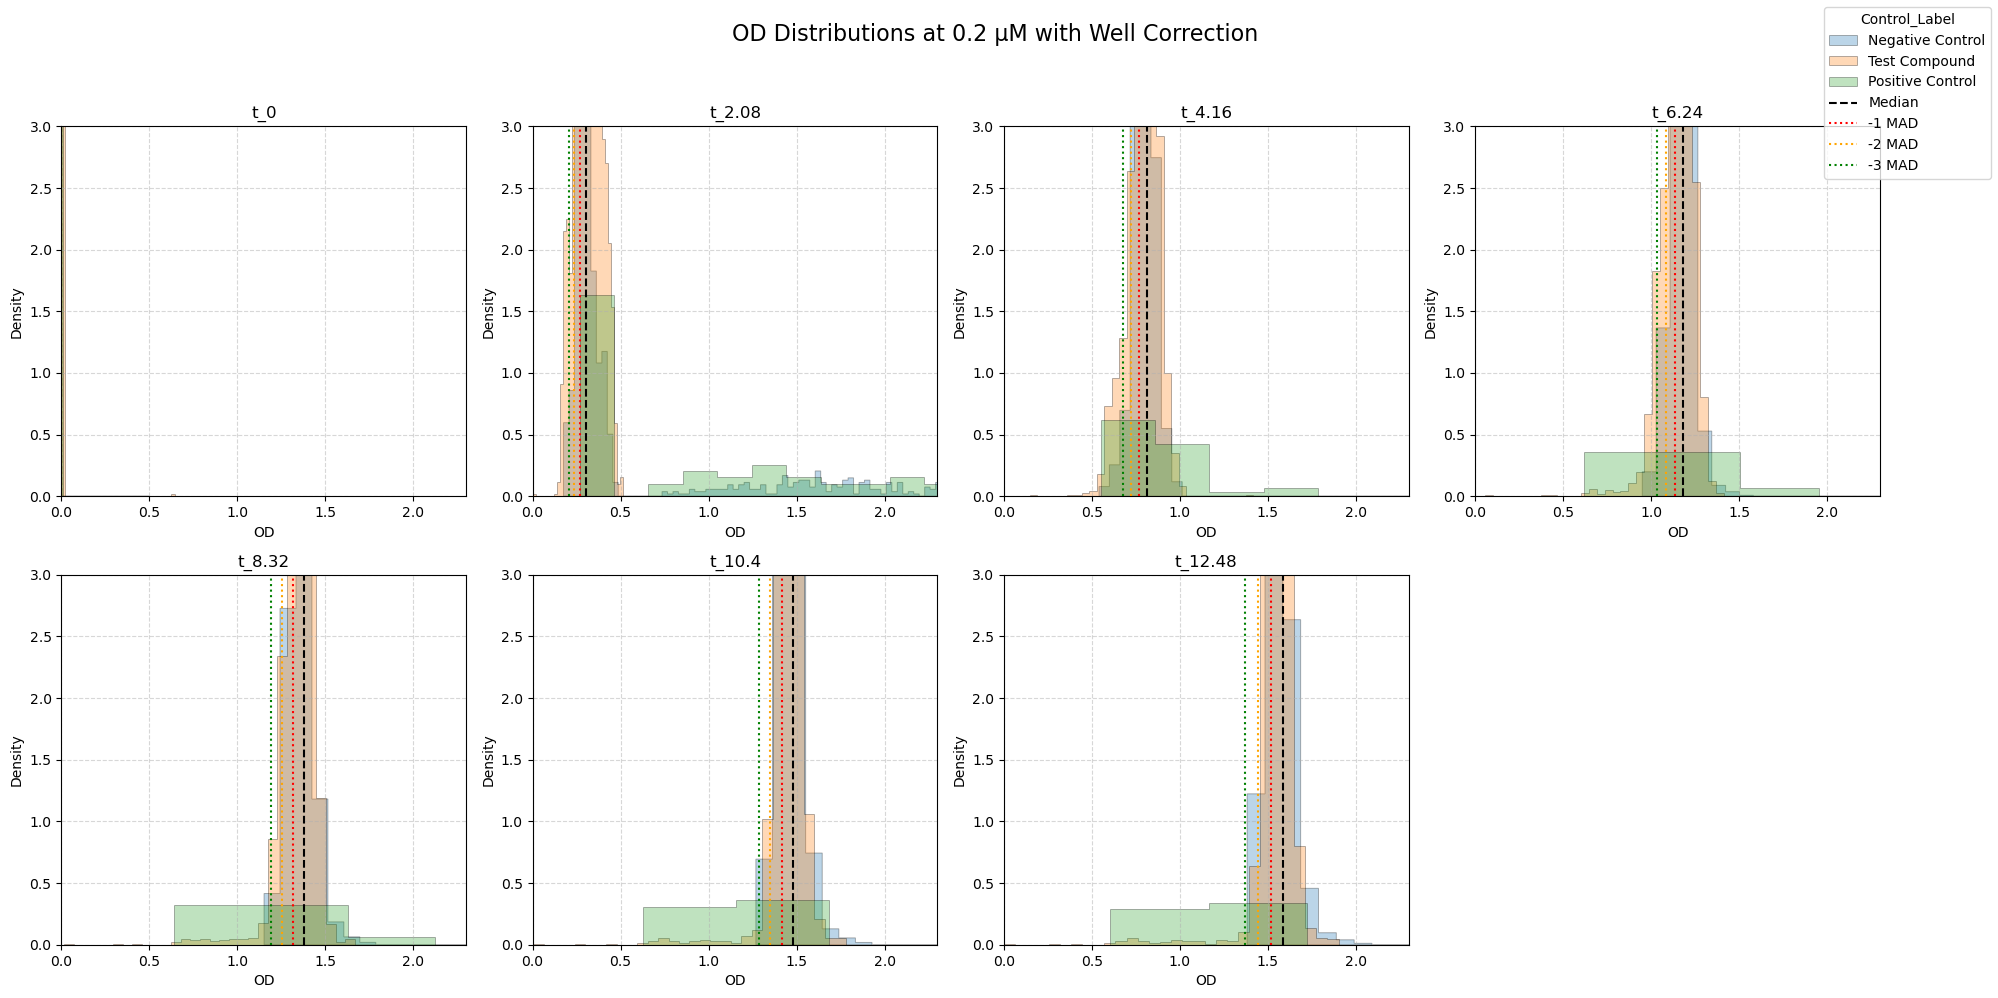

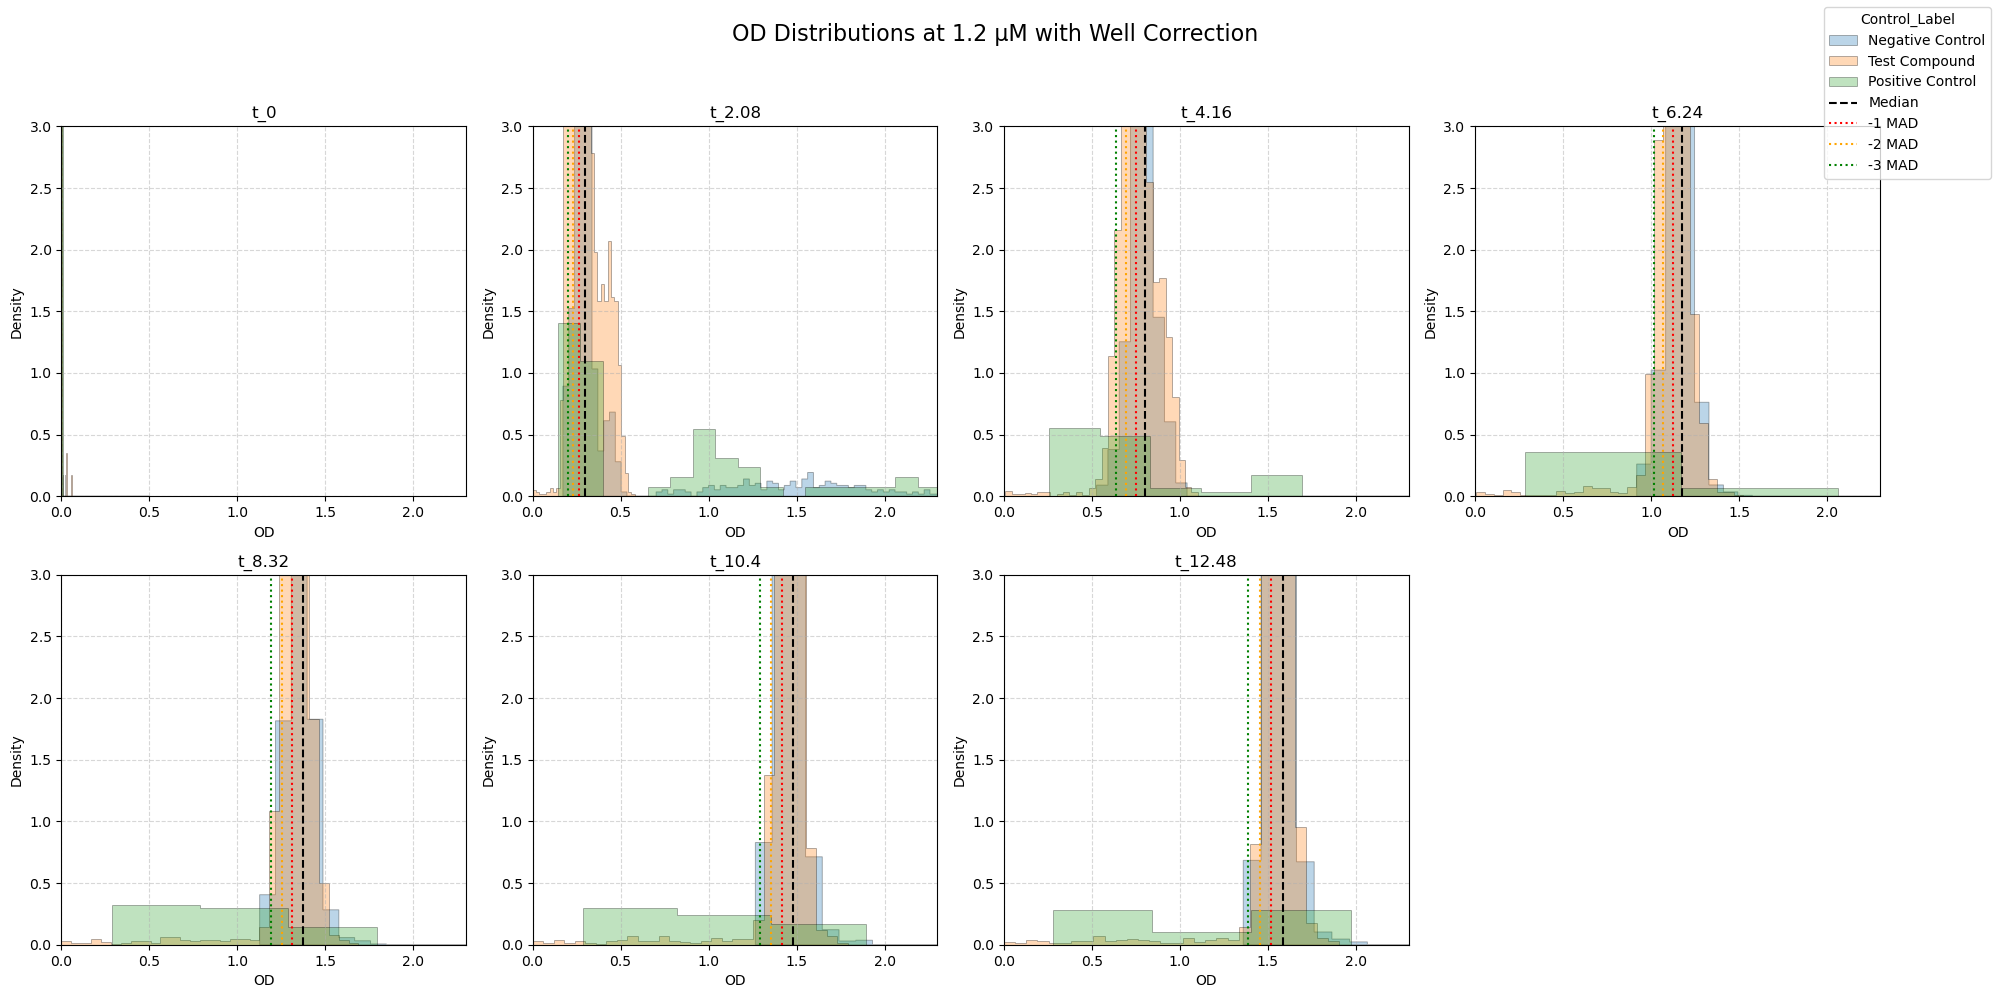

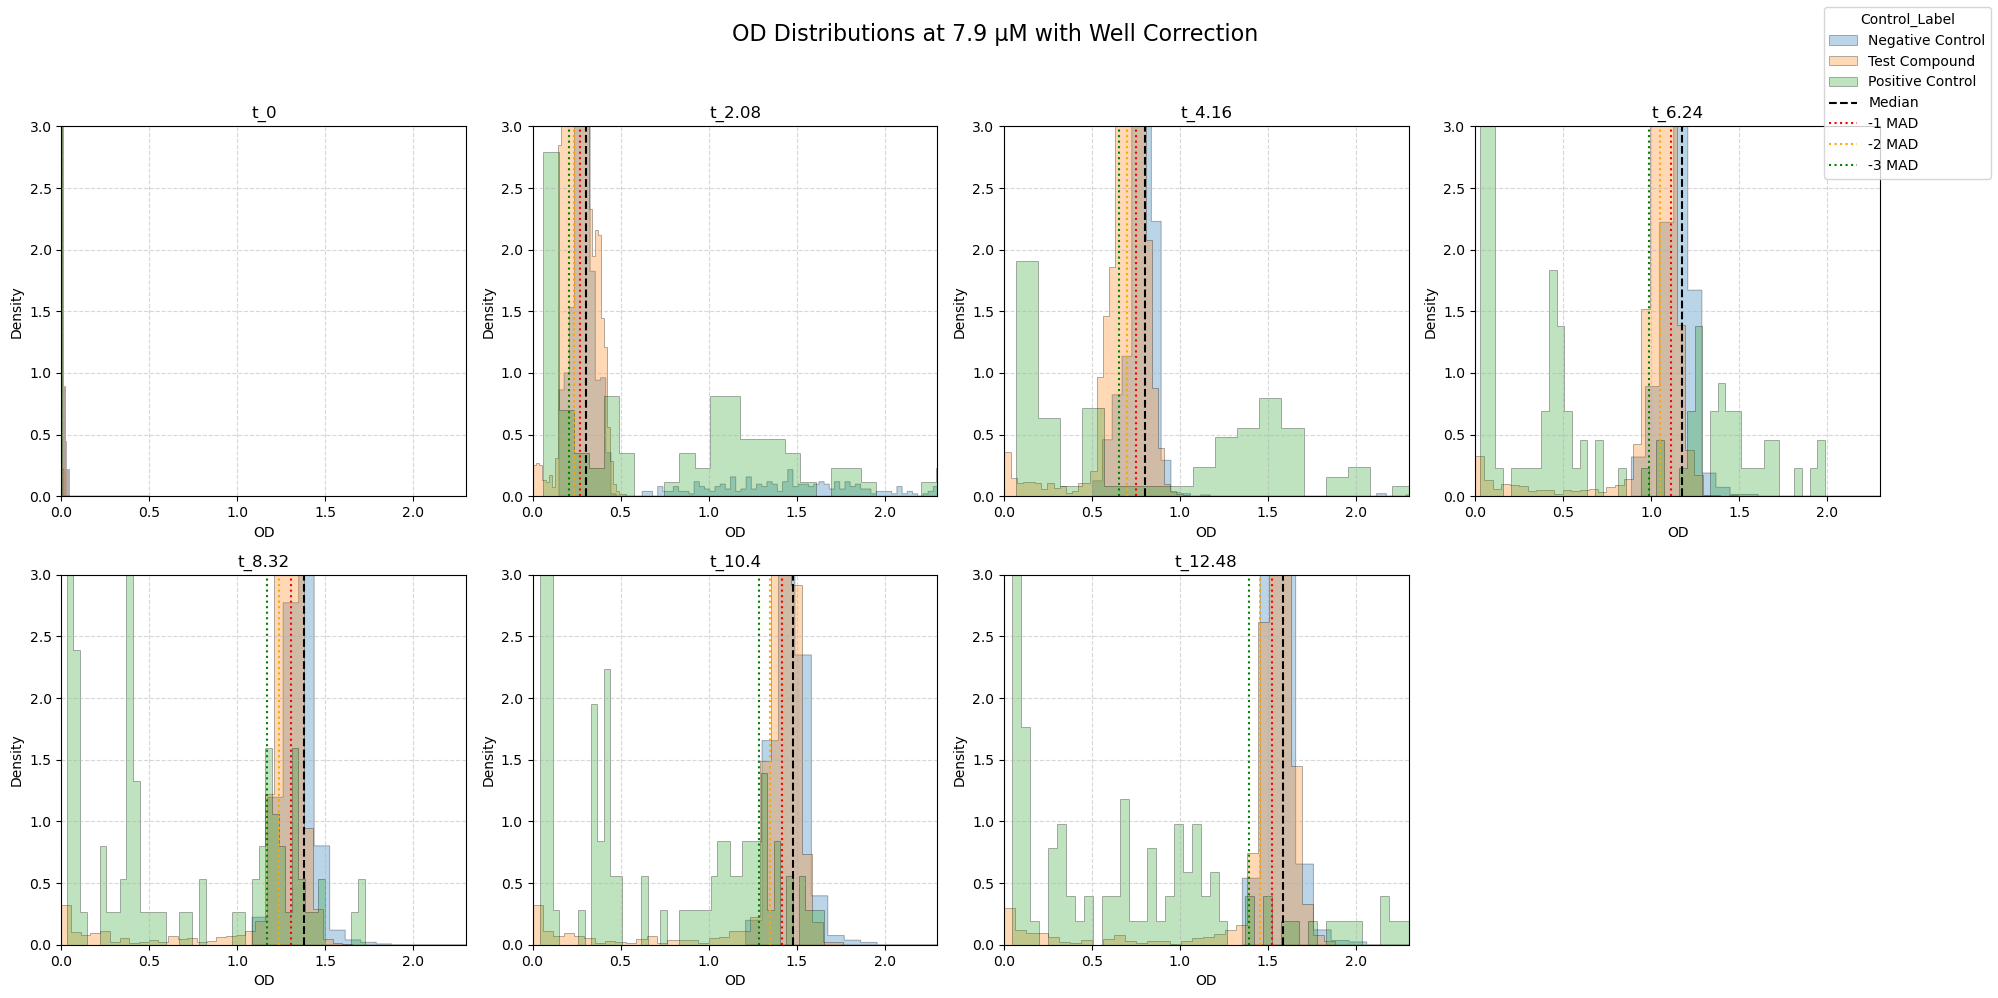

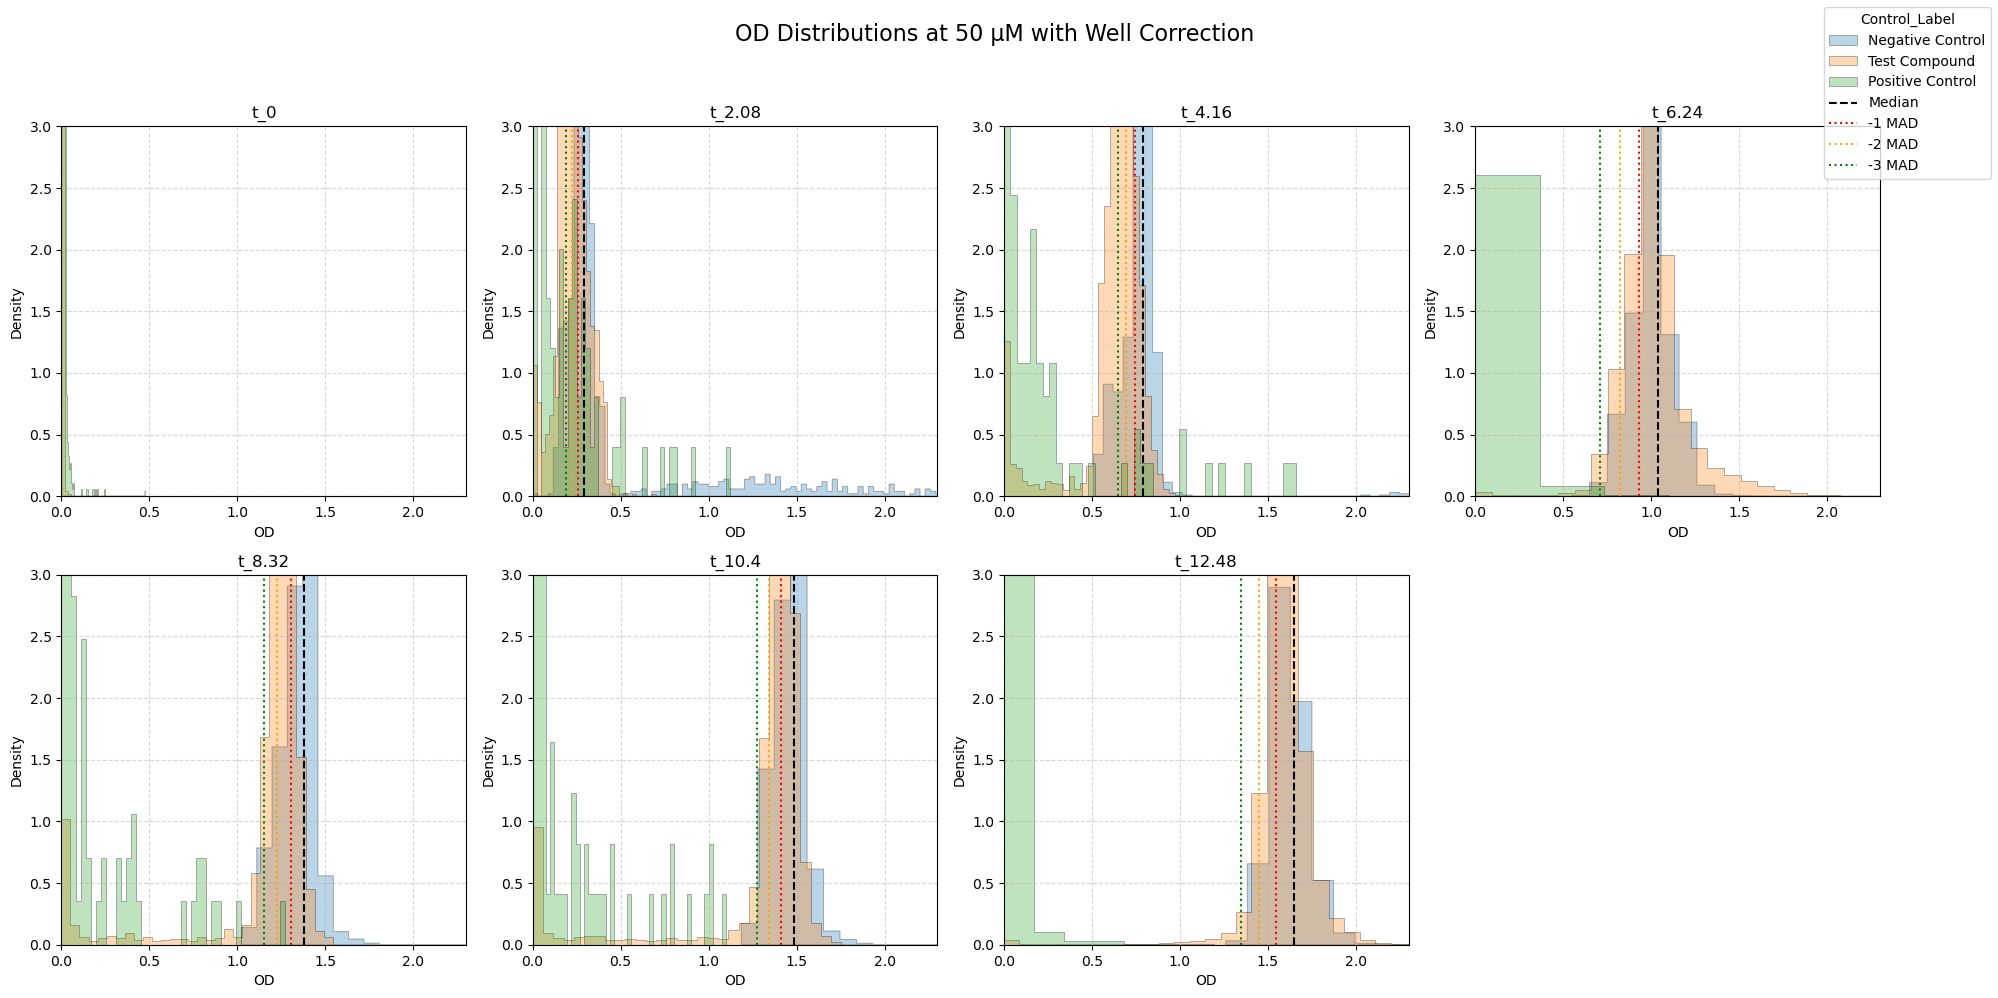

In [160]:
custom_bins = {
    -1: 300,                       # negatives
     0: 30,  # tests
     1: 45                        # positives
}

concentrations=[0.2,1.2,7.9,50]
for c in concentrations:
    plot_hist_od_distributions_long(df_well_corrected, concentration=c,bins=custom_bins, max_x=2.3,max_density=3)


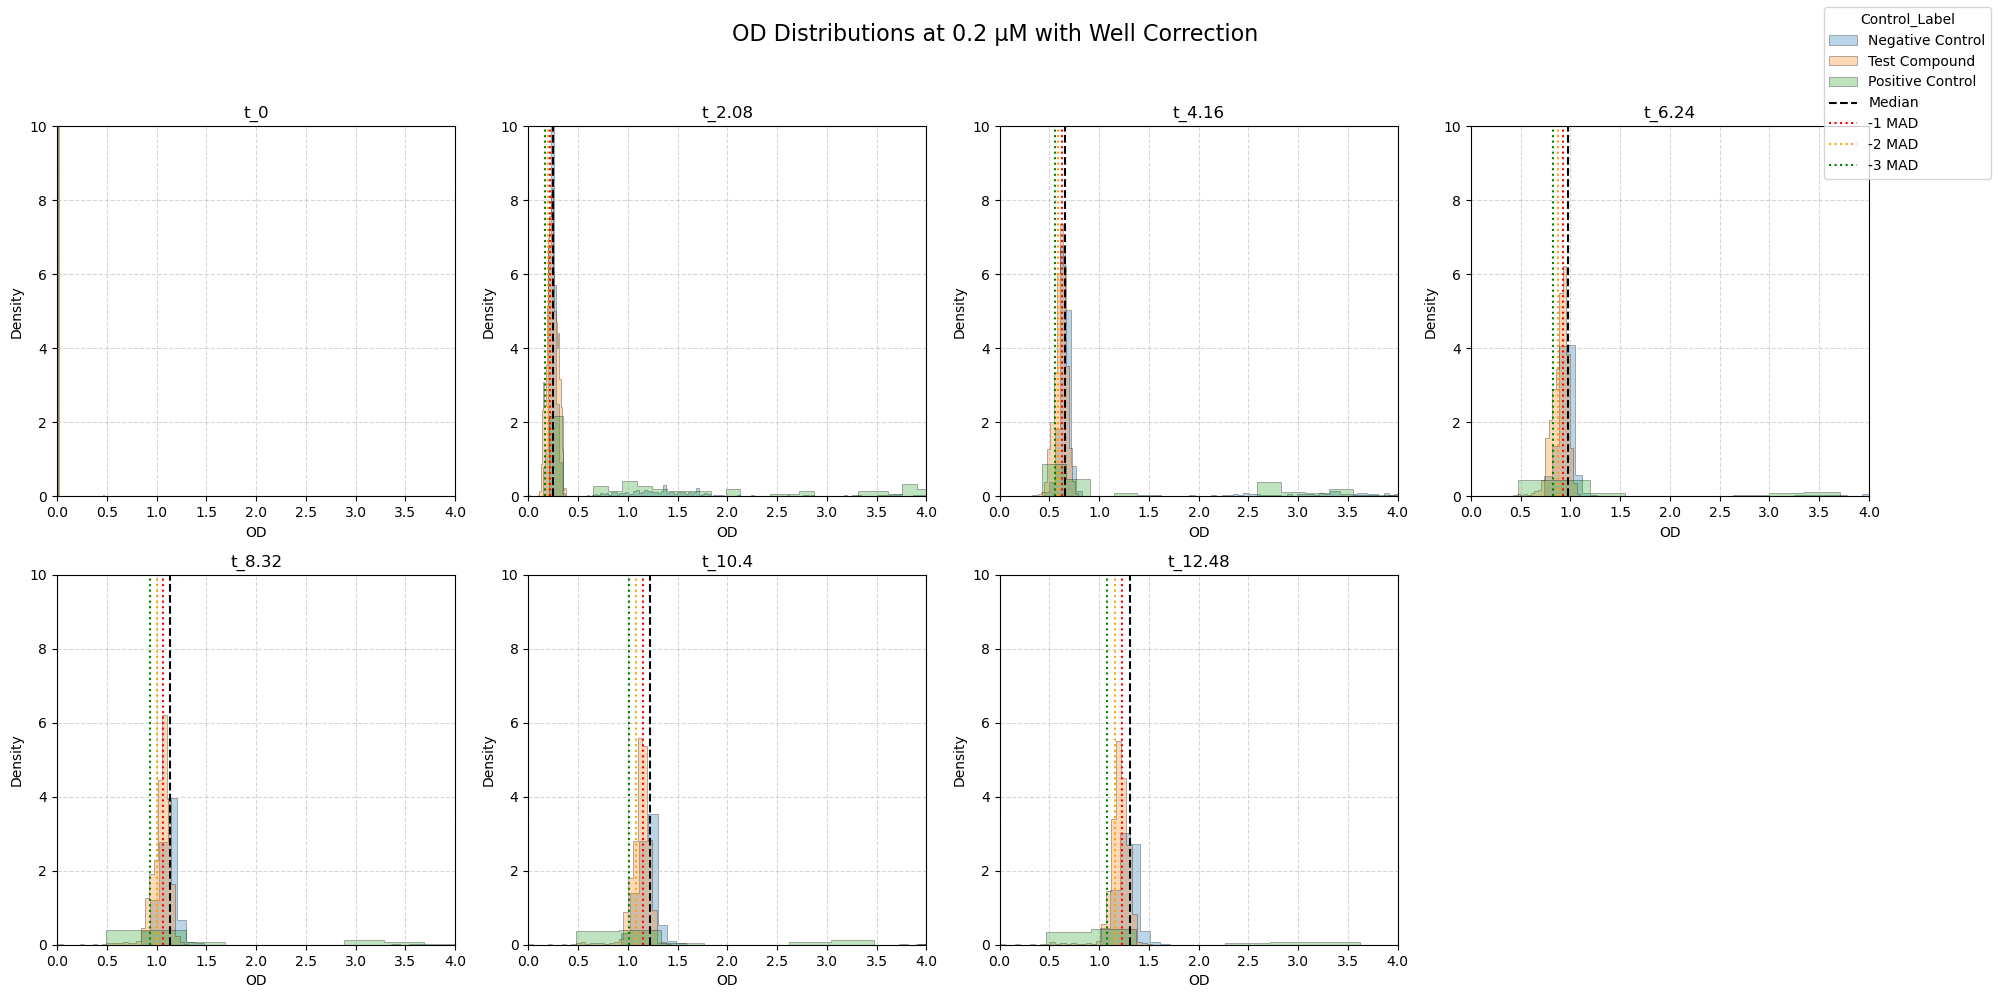

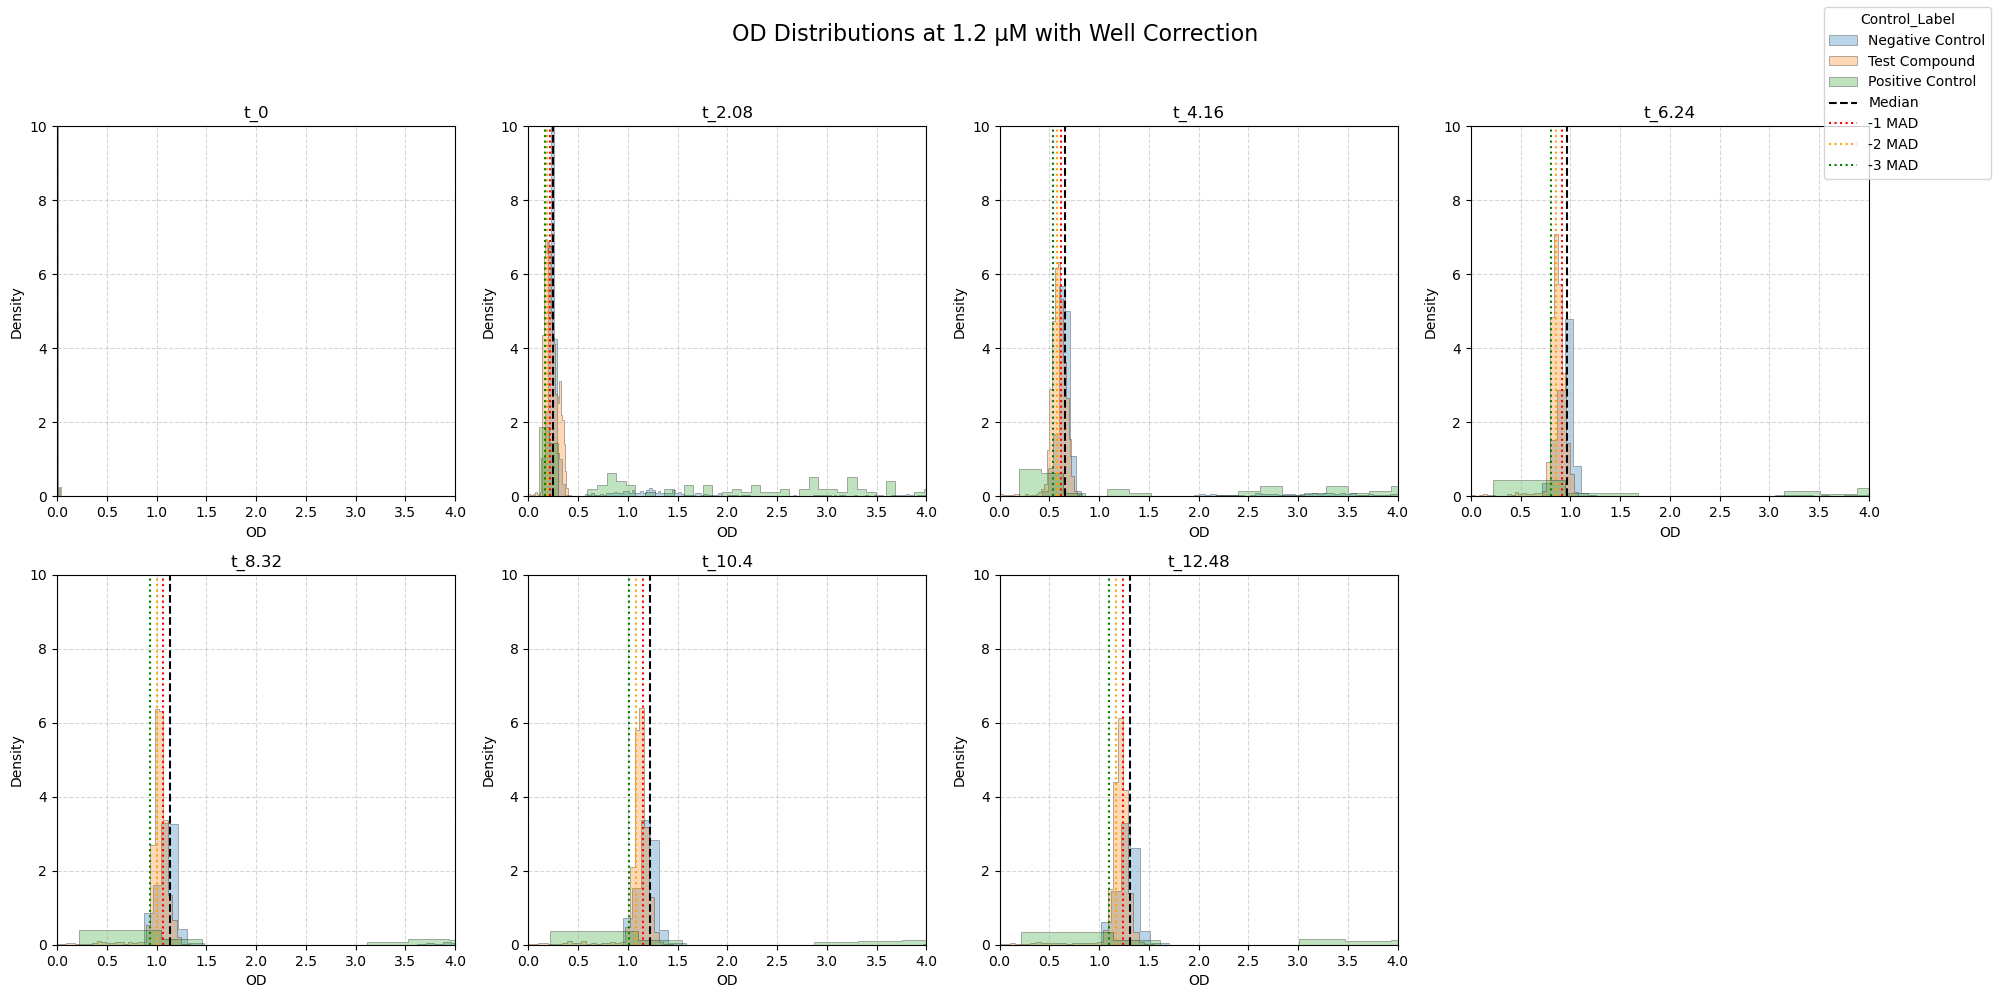

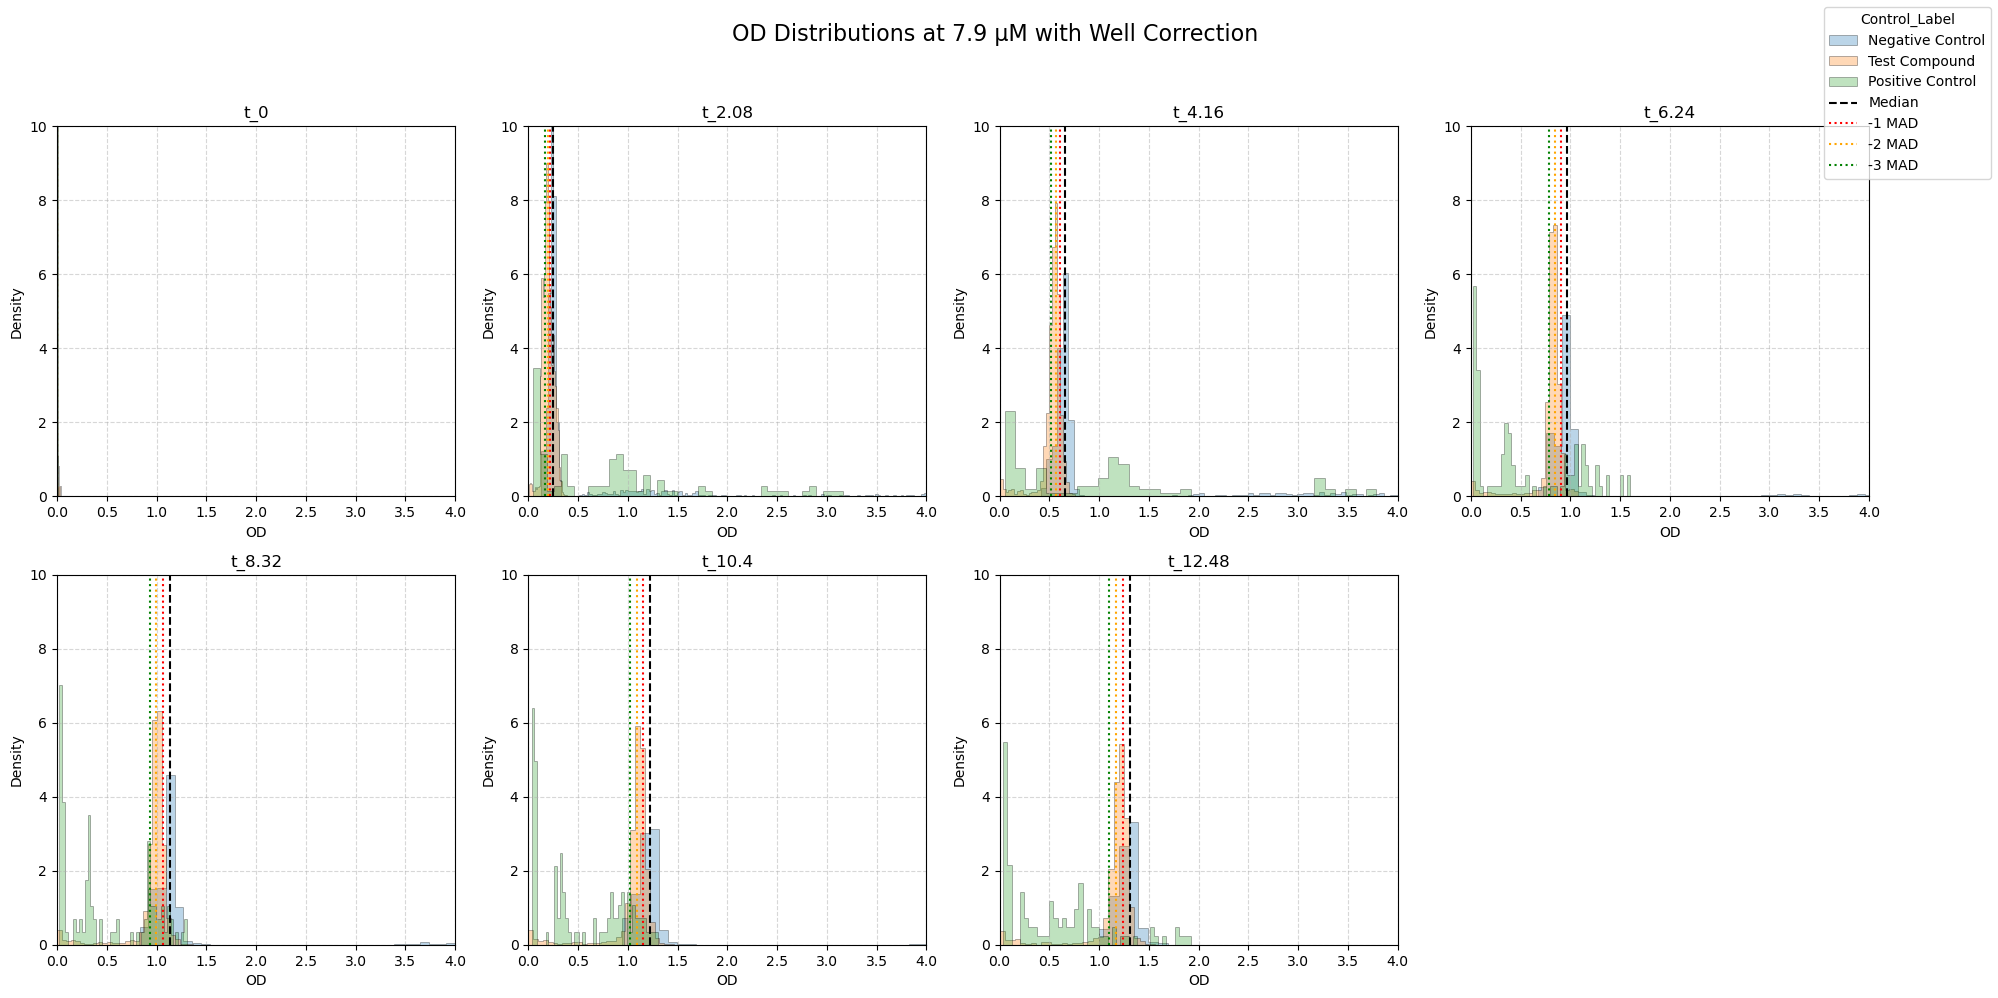

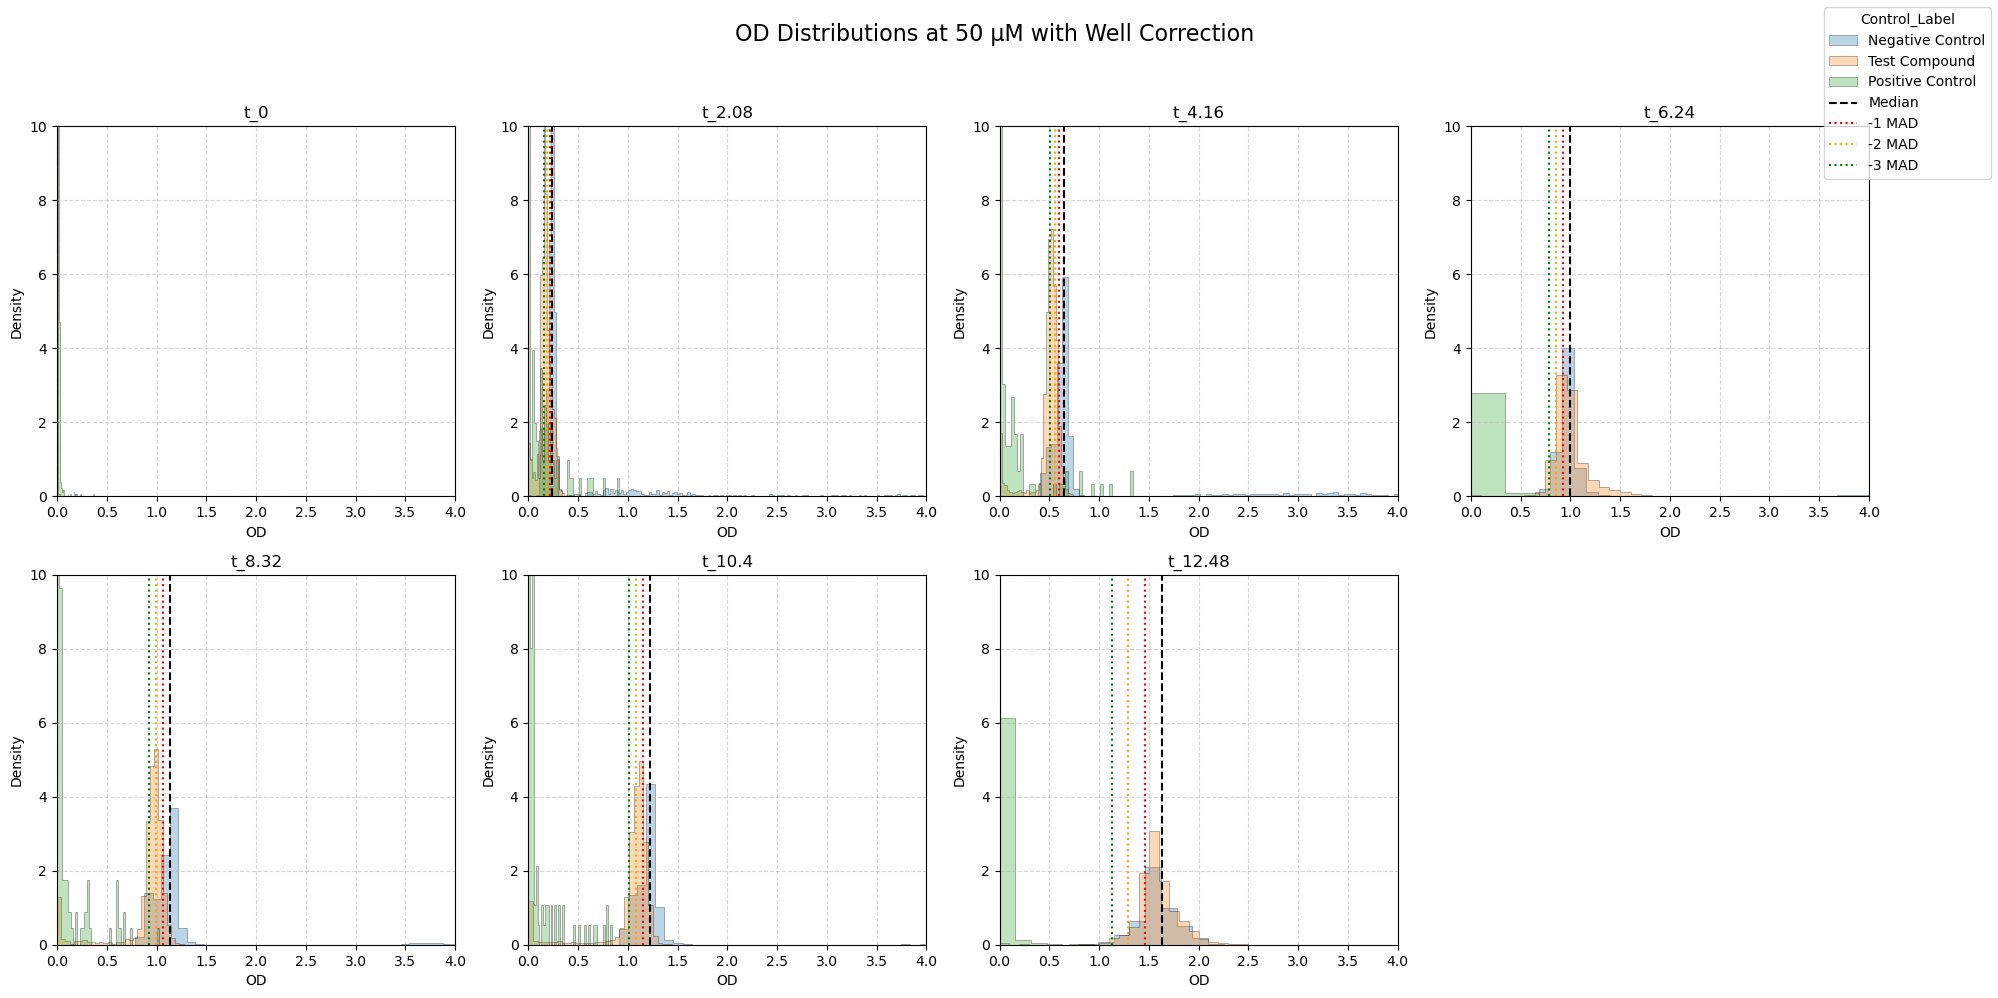

In [158]:
custom_bins = {
    -1: 250,                       # negatives
     0: 30,  # tests
     1: 45                        # positives
}

concentrations=[0.2,1.2,7.9,50]
for c in concentrations:
    plot_hist_od_distributions_long(df_plate_well_corrected, bins=custom_bins, concentration=c,max_x=4 ,max_density=10)


# Make train test dataset 

Need to average across Replicates

In [95]:
df_well_corrected

,Well,Plate_ID,Concentration,Compound,Control_Label,Replicate,Smiles,Timepoint,OD,threshold,is_Active
0,A01,546,0.2,DMSO,-1,NaN,NaN,t_0,0.000000,0.000000,0
1,A02,546,0.2,DMSO,-1,NaN,NaN,t_0,0.000000,0.000000,0
2,A03,546,0.2,Polyoxyethylene stearate,0,NaN,O=C(OCCO)CCCCCCCCCCCCCCCCC.[n].[n].[=].[10],t_0,0.000000,0.000000,0
3,A04,546,0.2,Lefamulin (acetate),0,NaN,CC(O)=O.C[C@@H]1C23[C@](C(CC3)=O)([H])C([C@H](...,t_0,0.000000,0.000000,0
4,A05,546,0.2,Cefodizime (sodium),0,NaN,O=C(C(N12)=C(CSC3=NC(C)=C(CC(O[Na])=O)S3)CS[C@...,t_0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
694395,L23,1886318-Y12-A100,50.0,Ciprofloxacin,1,OD_C,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,t_12.48,0.000000,0.986957,0
694396,M23,1886318-Y12-A100,50.0,Ciprofloxacin,1,OD_C,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,t_12.48,0.000000,0.986957,0
694397,N23,1886318-Y12-A100,50.0,Ciprofloxacin,1,OD_C,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,t_12.48,0.000000,0.986957,0
694398,O23,1886318-Y12-A100,50.0,Ciprofloxacin,1,OD_C,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,t_12.48,0.020555,0.986957,0


In [99]:
df_plate_well_corrected.columns

Index(['Well', 'Plate_ID', 'Concentration', 'Compound', 'Control_Label',
       'Replicate', 'Smiles', 'Timepoint', 'OD', 'threshold', 'is_Active'],
      dtype='object')

In [ ]:
#Remove controls

df_well_corrected = df_well_corrected[df_well_corrected['Compound'] != 'DMSO']
df_well_corrected =  df_well_corrected[df_well_corrected['Control_Label'] != 1]

df_plate_well_corrected = df_plate_well_corrected[df_plate_well_corrected['Compound'] != 'DMSO']
df_plate_well_corrected =  df_plate_well_corrected[df_plate_well_corrected['Control_Label'] != 1]


In [108]:
df_well_corrected=df_well_corrected.drop(columns=['Well','Plate_ID','Control_Label','threshold'])

df_plate_well_corrected=df_plate_well_corrected.drop(columns=['Well','Plate_ID','Control_Label','threshold'])

In [121]:
df_avg = (
    df_well_corrected
    .groupby(['Compound','Concentration','Timepoint'], as_index=False)
    .agg({
        'OD': 'mean',          # average across replicates
        'Smiles': 'first',     # takes the same smile string  
        'is_Active': 'max'   # keeps the flag
    })
    
)

# Inspect the first few rows
df_avg['is_Active'].value_counts()

0    271484
1     35788
Name: is_Active, dtype: int64

In [120]:
df_avg

,Compound,Concentration,Timepoint,OD,Smiles,is_Active
0,(+)-Camphor,0.2,t_0,0.000000,CC1(C)[C@@]2(C)CC[C@@H]1CC2=O,0
1,(+)-Camphor,0.2,t_10.4,0.914290,CC1(C)[C@@]2(C)CC[C@@H]1CC2=O,0
2,(+)-Camphor,0.2,t_12.48,0.988284,CC1(C)[C@@]2(C)CC[C@@H]1CC2=O,0
3,(+)-Camphor,0.2,t_2.08,0.271456,CC1(C)[C@@]2(C)CC[C@@H]1CC2=O,0
4,(+)-Camphor,0.2,t_4.16,0.562729,CC1(C)[C@@]2(C)CC[C@@H]1CC2=O,0
...,...,...,...,...,...,...
307267,β-Pinene,50.0,t_12.48,0.929243,C=C1[C@@](C2)([H])C(C)(C)[C@@]2([H])CC1,0
307268,β-Pinene,50.0,t_2.08,0.222471,C=C1[C@@](C2)([H])C(C)(C)[C@@]2([H])CC1,0
307269,β-Pinene,50.0,t_4.16,0.472103,C=C1[C@@](C2)([H])C(C)(C)[C@@]2([H])CC1,0
307270,β-Pinene,50.0,t_6.24,0.634806,C=C1[C@@](C2)([H])C(C)(C)[C@@]2([H])CC1,1
